In [1]:
# Dependences and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from scipy import stats

In [2]:
# Load the CSV file and display sample data
shopping_df = Path("shopping_trends_updated.csv")
shopping_df = pd.read_csv(shopping_df)
shopping_df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
#Add age groups to the DataFrame
shopping_df["Age Groups"] = pd.cut(
    x=shopping_df["Age"],
    bins =[1, 26, 42, 59, np.inf],
    labels=["Gen Z", "Millennials", "Gen X", "Baby Boomer"], 
)

shopping_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Groups
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Gen X
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Gen Z
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Gen X
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Gen Z
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Gen X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,Millennials
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Gen X
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,Gen X
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,Gen X


In [4]:
# Reorganize the columns within the DataFrame
organized_df = shopping_df[["Customer ID", "Age", "Age Groups", "Gender", 
                            "Item Purchased", "Category", "Purchase Amount (USD)", 
                            "Location", "Size", "Color", "Season", "Review Rating", 
                            "Subscription Status", "Shipping Type", "Discount Applied", 
                            "Promo Code Used", "Previous Purchases", "Payment Method", 
                            "Frequency of Purchases"]]
organized_df.head()

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
# Calculate the percentage of each group

# Percentage of Millennials
millennials_count = organized_df.loc[organized_df["Age Groups"] == "Millennials"].shape[0]
total_count = len(organized_df["Age Groups"])
millennials_percent = (millennials_count/total_count) * 100

# Percentage of GenZ
GenZ_count = organized_df.loc[organized_df["Age Groups"] == "Gen Z"].shape[0]
total_count = len(organized_df["Age Groups"])
GenZ_percent = (GenZ_count/total_count) * 100

# Percentage of GenX
GenX_count = organized_df.loc[organized_df["Age Groups"] == "Gen X"].shape[0]
total_count = len(organized_df["Age Groups"])
GenX_percent = (GenX_count/total_count) * 100

# Percentage of Baby Boomers
Baby_count = organized_df.loc[organized_df["Age Groups"] == "Baby Boomer"].shape[0]
total_count = len(organized_df["Age Groups"])
Baby_percent = (Baby_count/total_count) * 100

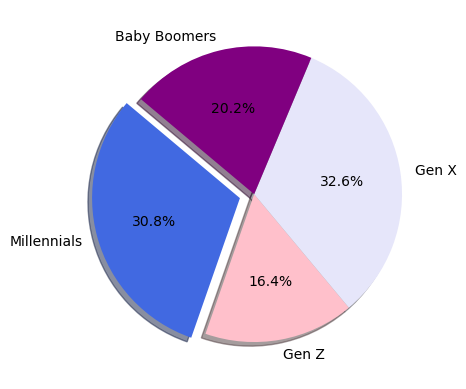

In [6]:
# Establish data for the pie chart
labels = ["Millennials", "Gen Z", "Gen X", "Baby Boomers"]
sizes = [millennials_percent, GenZ_percent, GenX_percent, Baby_percent]
colors = ['royalblue','pink','lavender','purple']
explode = (0.1, 0, 0, 0)

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [7]:
# organized_df.to_csv("output_data/shopping_trends.csv", index_label="Customer ID")

In [8]:
gen_group_count = pd.DataFrame(organized_df.groupby("Age Groups")["Customer ID"].count())
gen_group_count

,Customer ID
Age Groups,
Gen Z,640
Millennials,1200
Gen X,1272
Baby Boomer,788


In [9]:
organized_df["Age Groups"].value_counts()

Age Groups
Gen X          1272
Millennials    1200
Baby Boomer     788
Gen Z           640
Name: count, dtype: int64

In [10]:
organized_df["Gender"].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [11]:
organized_df.groupby(["Age Groups"])["Gender"].value_counts()

Age Groups   Gender
Gen Z        Male      442
             Female    198
Millennials  Male      822
             Female    378
Gen X        Male      846
             Female    426
Baby Boomer  Male      542
             Female    246
Name: count, dtype: int64

In [12]:
GenZ_male = organized_df.loc[(organized_df["Age Groups"]=="Gen Z")&(organized_df["Gender"]=="Male")].sample(n=198)
GenZ_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1757,1758,19,Gen Z,Male,Dress,Clothing,94,Michigan,L,Yellow,Fall,3.6,No,Standard,No,No,48,Debit Card,Annually
1266,1267,20,Gen Z,Male,Blouse,Clothing,31,North Dakota,M,Peach,Fall,4.0,No,Standard,Yes,Yes,14,Debit Card,Every 3 Months
1977,1978,24,Gen Z,Male,Sandals,Footwear,49,Florida,M,Teal,Summer,2.6,No,Free Shipping,No,No,32,Bank Transfer,Annually
392,393,26,Gen Z,Male,T-shirt,Clothing,82,Idaho,XL,Black,Spring,3.3,Yes,Next Day Air,Yes,Yes,38,Credit Card,Annually
1349,1350,21,Gen Z,Male,Socks,Clothing,36,South Carolina,XL,Black,Spring,3.2,No,Next Day Air,Yes,Yes,23,Cash,Bi-Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,1986,23,Gen Z,Male,Gloves,Accessories,97,Tennessee,M,Gold,Spring,3.9,No,2-Day Shipping,No,No,6,Credit Card,Fortnightly
2177,2178,24,Gen Z,Male,Gloves,Accessories,93,Montana,XL,Green,Winter,3.0,No,Express,No,No,9,PayPal,Bi-Weekly
2251,2252,26,Gen Z,Male,Shoes,Footwear,94,Virginia,L,Gold,Fall,3.8,No,Free Shipping,No,No,22,Debit Card,Monthly
1520,1521,21,Gen Z,Male,Hat,Accessories,66,Iowa,M,Brown,Summer,4.4,No,2-Day Shipping,Yes,Yes,39,Cash,Quarterly


In [13]:
Mill_male = organized_df.loc[(organized_df["Age Groups"]=="Millennials")&(organized_df["Gender"]=="Male")].sample(n=198)
Mill_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
29,30,31,Millennials,Male,Dress,Clothing,48,Wyoming,S,Black,Fall,4.1,Yes,Store Pickup,Yes,Yes,14,Credit Card,Weekly
1474,1475,31,Millennials,Male,Sweater,Clothing,72,New Jersey,S,Pink,Fall,3.9,No,Next Day Air,Yes,Yes,6,Credit Card,Monthly
1436,1437,35,Millennials,Male,Sneakers,Footwear,83,Minnesota,M,Gray,Winter,3.7,No,Free Shipping,Yes,Yes,23,PayPal,Fortnightly
704,705,34,Millennials,Male,Hoodie,Clothing,66,Idaho,S,Black,Spring,3.2,Yes,Express,Yes,Yes,18,PayPal,Annually
1894,1895,42,Millennials,Male,Hoodie,Clothing,90,Arizona,M,Purple,Fall,2.5,No,Free Shipping,No,No,48,Debit Card,Bi-Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,1039,41,Millennials,Male,Pants,Clothing,74,Nebraska,XL,Cyan,Fall,3.0,Yes,Express,Yes,Yes,3,Bank Transfer,Weekly
943,944,32,Millennials,Male,Hat,Accessories,63,Oklahoma,L,Cyan,Winter,3.8,Yes,Next Day Air,Yes,Yes,13,Venmo,Fortnightly
1301,1302,42,Millennials,Male,Shirt,Clothing,54,Maine,M,Orange,Fall,5.0,No,Express,Yes,Yes,21,Debit Card,Weekly
182,183,38,Millennials,Male,Gloves,Accessories,96,Alabama,XL,Purple,Summer,2.8,Yes,Store Pickup,Yes,Yes,10,Debit Card,Annually


In [14]:
GenX_male = organized_df.loc[(organized_df["Age Groups"]=="Gen X")&(organized_df["Gender"]=="Male")].sample(n=198)
GenX_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
558,559,50,Gen X,Male,Sneakers,Footwear,77,Iowa,L,Teal,Fall,3.2,Yes,Express,Yes,Yes,43,Debit Card,Every 3 Months
2532,2533,55,Gen X,Male,Socks,Clothing,86,Nebraska,S,Charcoal,Summer,2.6,No,Next Day Air,No,No,4,Debit Card,Weekly
1898,1899,59,Gen X,Male,Pants,Clothing,97,Texas,L,Magenta,Fall,3.5,No,Next Day Air,No,No,25,Venmo,Monthly
1818,1819,58,Gen X,Male,Sunglasses,Accessories,39,North Carolina,M,White,Fall,3.8,No,Express,No,No,47,Debit Card,Every 3 Months
407,408,45,Gen X,Male,Hoodie,Clothing,76,North Carolina,XL,Teal,Spring,3.1,Yes,Next Day Air,Yes,Yes,5,Credit Card,Bi-Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,1868,45,Gen X,Male,Skirt,Clothing,52,Delaware,M,Brown,Fall,3.4,No,2-Day Shipping,No,No,20,Venmo,Quarterly
2547,2548,47,Gen X,Male,Jacket,Outerwear,97,Mississippi,M,Beige,Summer,3.2,No,2-Day Shipping,No,No,16,Cash,Weekly
2460,2461,58,Gen X,Male,Jeans,Clothing,36,Maine,S,Lavender,Winter,4.0,No,Store Pickup,No,No,28,Credit Card,Annually
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly


In [15]:
Baby_male = organized_df.loc[(organized_df["Age Groups"]=="Baby Boomer")&(organized_df["Gender"]=="Male")].sample(n=198)
Baby_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2049,2050,68,Baby Boomer,Male,Boots,Footwear,24,Rhode Island,L,Blue,Fall,2.7,No,Standard,No,No,15,Venmo,Annually
1926,1927,66,Baby Boomer,Male,Backpack,Accessories,93,New Mexico,M,Silver,Spring,3.0,No,Express,No,No,6,PayPal,Annually
2496,2497,67,Baby Boomer,Male,Scarf,Accessories,79,Illinois,S,Yellow,Summer,3.2,No,Store Pickup,No,No,37,Credit Card,Weekly
812,813,64,Baby Boomer,Male,Boots,Footwear,56,Alaska,M,Olive,Summer,3.2,Yes,Standard,Yes,Yes,32,Credit Card,Weekly
1304,1305,64,Baby Boomer,Male,Backpack,Accessories,63,Montana,S,Orange,Spring,4.0,No,2-Day Shipping,Yes,Yes,18,PayPal,Every 3 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,1619,63,Baby Boomer,Male,Sandals,Footwear,72,Michigan,L,Purple,Summer,5.0,No,Standard,Yes,Yes,39,Debit Card,Quarterly
308,309,66,Baby Boomer,Male,Handbag,Accessories,29,Maryland,M,Beige,Fall,3.7,Yes,Standard,Yes,Yes,45,Venmo,Bi-Weekly
642,643,64,Baby Boomer,Male,Skirt,Clothing,25,Arkansas,L,Red,Spring,2.8,Yes,2-Day Shipping,Yes,Yes,14,Debit Card,Bi-Weekly
1504,1505,60,Baby Boomer,Male,Jacket,Outerwear,80,Alaska,M,Teal,Winter,4.2,No,Next Day Air,Yes,Yes,10,Bank Transfer,Monthly


In [16]:
GenZ_female = organized_df.loc[(organized_df["Age Groups"]=="Gen Z")&(organized_df["Gender"]=="Female")].sample(n=198)
GenZ_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3300,3301,26,Gen Z,Female,Hat,Accessories,80,Oklahoma,M,Charcoal,Spring,4.0,No,Express,No,No,40,Bank Transfer,Bi-Weekly
3681,3682,26,Gen Z,Female,Gloves,Accessories,73,Connecticut,XL,Magenta,Fall,4.2,No,Next Day Air,No,No,33,Debit Card,Monthly
3040,3041,18,Gen Z,Female,Handbag,Accessories,32,Nebraska,M,Gold,Fall,4.1,No,Express,No,No,10,Cash,Fortnightly
3422,3423,19,Gen Z,Female,Coat,Outerwear,91,New York,L,Beige,Winter,3.2,No,Next Day Air,No,No,9,Venmo,Monthly
3594,3595,19,Gen Z,Female,Scarf,Accessories,87,Alabama,L,Charcoal,Summer,2.6,No,2-Day Shipping,No,No,29,Venmo,Quarterly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3268,3269,22,Gen Z,Female,Dress,Clothing,97,Arkansas,M,Cyan,Fall,2.8,No,Free Shipping,No,No,5,Bank Transfer,Every 3 Months
3570,3571,23,Gen Z,Female,Dress,Clothing,97,Louisiana,XL,Teal,Winter,4.7,No,Standard,No,No,32,Debit Card,Annually
3848,3849,22,Gen Z,Female,Jewelry,Accessories,60,New Hampshire,M,Magenta,Winter,3.0,No,Next Day Air,No,No,39,Cash,Every 3 Months
3343,3344,24,Gen Z,Female,Shorts,Clothing,31,Kentucky,XL,Green,Winter,3.6,No,2-Day Shipping,No,No,6,Cash,Bi-Weekly


In [17]:
Mill_female = organized_df.loc[(organized_df["Age Groups"]=="Millennials")&(organized_df["Gender"]=="Female")].sample(n=198)
Mill_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2998,2999,31,Millennials,Female,Hoodie,Clothing,53,Alaska,M,Red,Summer,4.7,No,Express,No,No,30,Debit Card,Quarterly
3008,3009,39,Millennials,Female,Shoes,Footwear,86,New Mexico,M,Gold,Winter,4.9,No,Free Shipping,No,No,19,PayPal,Weekly
3357,3358,41,Millennials,Female,Hoodie,Clothing,67,Arkansas,M,Pink,Winter,3.5,No,Free Shipping,No,No,37,Credit Card,Monthly
3258,3259,31,Millennials,Female,Shoes,Footwear,51,New Jersey,M,Magenta,Spring,4.3,No,Express,No,No,11,Credit Card,Bi-Weekly
3589,3590,31,Millennials,Female,Belt,Accessories,73,New Hampshire,M,Blue,Spring,4.8,No,Next Day Air,No,No,38,Cash,Every 3 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,2947,38,Millennials,Female,Pants,Clothing,77,Hawaii,L,Purple,Spring,2.8,No,Free Shipping,No,No,29,Bank Transfer,Quarterly
3513,3514,30,Millennials,Female,Blouse,Clothing,74,Alaska,XL,Charcoal,Spring,4.2,No,Store Pickup,No,No,29,Credit Card,Fortnightly
2976,2977,30,Millennials,Female,Coat,Outerwear,97,Nebraska,M,Silver,Summer,2.8,No,Express,No,No,28,Cash,Fortnightly
3370,3371,30,Millennials,Female,Belt,Accessories,31,Illinois,M,Charcoal,Summer,2.8,No,Store Pickup,No,No,46,Cash,Fortnightly


In [18]:
GenX_female = organized_df.loc[(organized_df["Age Groups"]=="Gen X")&(organized_df["Gender"]=="Female")].sample(n=198)
GenX_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2808,2809,49,Gen X,Female,Skirt,Clothing,62,Tennessee,M,Beige,Spring,3.9,No,Free Shipping,No,No,45,PayPal,Every 3 Months
3833,3834,44,Gen X,Female,Jacket,Outerwear,93,Arizona,L,Gray,Summer,4.6,No,Free Shipping,No,No,17,PayPal,Every 3 Months
3037,3038,51,Gen X,Female,Belt,Accessories,44,Iowa,L,Charcoal,Summer,4.8,No,Next Day Air,No,No,2,Cash,Annually
2698,2699,55,Gen X,Female,Hoodie,Clothing,57,Virginia,M,Magenta,Summer,3.6,No,Store Pickup,No,No,34,Venmo,Quarterly
3104,3105,43,Gen X,Female,Pants,Clothing,56,Georgia,S,Turquoise,Summer,5.0,No,2-Day Shipping,No,No,41,Debit Card,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688,2689,53,Gen X,Female,Handbag,Accessories,63,West Virginia,XL,Turquoise,Spring,2.9,No,2-Day Shipping,No,No,18,Credit Card,Every 3 Months
3127,3128,55,Gen X,Female,Gloves,Accessories,94,Louisiana,M,Beige,Winter,3.4,No,Free Shipping,No,No,43,Credit Card,Every 3 Months
3538,3539,56,Gen X,Female,Shoes,Footwear,63,Iowa,S,White,Spring,4.5,No,Store Pickup,No,No,21,Venmo,Monthly
3052,3053,48,Gen X,Female,Shoes,Footwear,38,Maine,XL,Olive,Spring,4.5,No,Store Pickup,No,No,7,Bank Transfer,Fortnightly


In [19]:
Baby_female = organized_df.loc[(organized_df["Age Groups"]=="Baby Boomer")&(organized_df["Gender"]=="Female")].sample(n=198)
Baby_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3256,3257,60,Baby Boomer,Female,Sunglasses,Accessories,26,Wisconsin,L,Teal,Winter,4.7,No,Free Shipping,No,No,50,Venmo,Every 3 Months
3728,3729,62,Baby Boomer,Female,Jacket,Outerwear,31,Vermont,L,Red,Winter,3.0,No,Standard,No,No,1,Debit Card,Annually
3653,3654,67,Baby Boomer,Female,Coat,Outerwear,20,Minnesota,M,Blue,Spring,3.9,No,Next Day Air,No,No,39,Credit Card,Fortnightly
3832,3833,64,Baby Boomer,Female,Boots,Footwear,38,Kansas,XL,Purple,Winter,4.8,No,2-Day Shipping,No,No,27,Cash,Weekly
3292,3293,62,Baby Boomer,Female,Handbag,Accessories,23,Missouri,L,Gray,Spring,4.9,No,Standard,No,No,18,Bank Transfer,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765,2766,64,Baby Boomer,Female,Gloves,Accessories,70,Colorado,M,Purple,Summer,4.3,No,2-Day Shipping,No,No,24,Credit Card,Quarterly
3843,3844,64,Baby Boomer,Female,Hat,Accessories,71,Georgia,L,Silver,Winter,4.0,No,Free Shipping,No,No,48,Venmo,Every 3 Months
3575,3576,61,Baby Boomer,Female,Coat,Outerwear,95,Kentucky,M,Violet,Fall,3.7,No,Express,No,No,49,Venmo,Bi-Weekly
3128,3129,65,Baby Boomer,Female,Jacket,Outerwear,32,Arkansas,S,Indigo,Fall,4.4,No,Standard,No,No,20,Cash,Annually


In [20]:
GenZ_male["Review Rating"]

1757    3.6
1266    4.0
1977    2.6
392     3.3
1349    3.2
       ... 
1985    3.9
2177    3.0
2251    3.8
1520    4.4
16      4.1
Name: Review Rating, Length: 198, dtype: float64

In [21]:
Mill_male["Review Rating"]

29      4.1
1474    3.9
1436    3.7
704     3.2
1894    2.5
       ... 
1038    3.0
943     3.8
1301    5.0
182     2.8
626     3.9
Name: Review Rating, Length: 198, dtype: float64

In [22]:
GenX_male["Review Rating"]

558     3.2
2532    2.6
1898    3.5
1818    3.8
407     3.1
       ... 
1867    3.4
2547    3.2
2460    4.0
0       3.1
360     3.0
Name: Review Rating, Length: 198, dtype: float64

In [23]:
Baby_male["Review Rating"]

2049    2.7
1926    3.0
2496    3.2
812     3.2
1304    4.0
       ... 
1618    5.0
308     3.7
642     2.8
1504    4.2
901     4.7
Name: Review Rating, Length: 198, dtype: float64

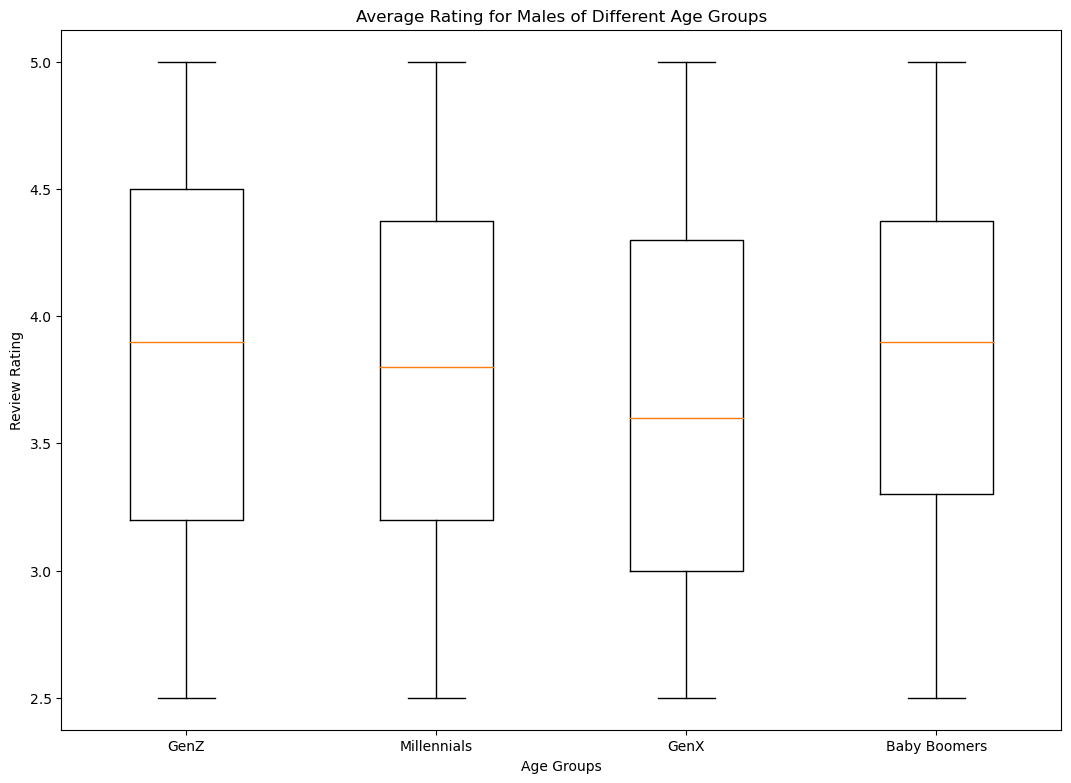

In [24]:
# Box and Whisker plot for Males of different Age Group and Review Rating
# Answers question 1: Is there a relationship between product rating and 
# demographic factors (age group and sex (male/female)?

# Establishing data to be plotted
data_1 = GenZ_male["Review Rating"]
data_2 = Mill_male["Review Rating"]
data_3 = GenX_male["Review Rating"]
data_4 = Baby_male["Review Rating"]
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize = (10,7))

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Average Rating for Males of Different Age Groups')
ax.set_ylabel('Review Rating')
ax.set_xlabel('Age Groups')

# Creating the plot
bp = ax.boxplot(data)
plt.xticks([1, 2, 3, 4], ['GenZ', 'Millennials', 'GenX', 'Baby Boomers'])

# Show plot
plt.show()

Analysis: Males within the Baby Boomers Age Group gave a the lowest median Review Rating, while males within the Millennials Age Group gave the lowest median Review Rating. The median Review Ratings for Males within GenX and GenZ are roughly the same. GenZ, Millennials, and GenX have roughly the same average review rating, while Baby Boomers has the lowest average review rating.

In [25]:
GenZ_female["Review Rating"]

3300    4.0
3681    4.2
3040    4.1
3422    3.2
3594    2.6
       ... 
3268    2.8
3570    4.7
3848    3.0
3343    3.6
3598    4.6
Name: Review Rating, Length: 198, dtype: float64

In [26]:
Mill_female["Review Rating"]

2998    4.7
3008    4.9
3357    3.5
3258    4.3
3589    4.8
       ... 
2946    2.8
3513    4.2
2976    2.8
3370    2.8
3353    4.6
Name: Review Rating, Length: 198, dtype: float64

In [27]:
GenX_female["Review Rating"]

2808    3.9
3833    4.6
3037    4.8
2698    3.6
3104    5.0
       ... 
2688    2.9
3127    3.4
3538    4.5
3052    4.5
3418    2.8
Name: Review Rating, Length: 198, dtype: float64

In [28]:
Baby_female["Review Rating"]

3256    4.7
3728    3.0
3653    3.9
3832    4.8
3292    4.9
       ... 
2765    4.3
3843    4.0
3575    3.7
3128    4.4
3009    4.6
Name: Review Rating, Length: 198, dtype: float64

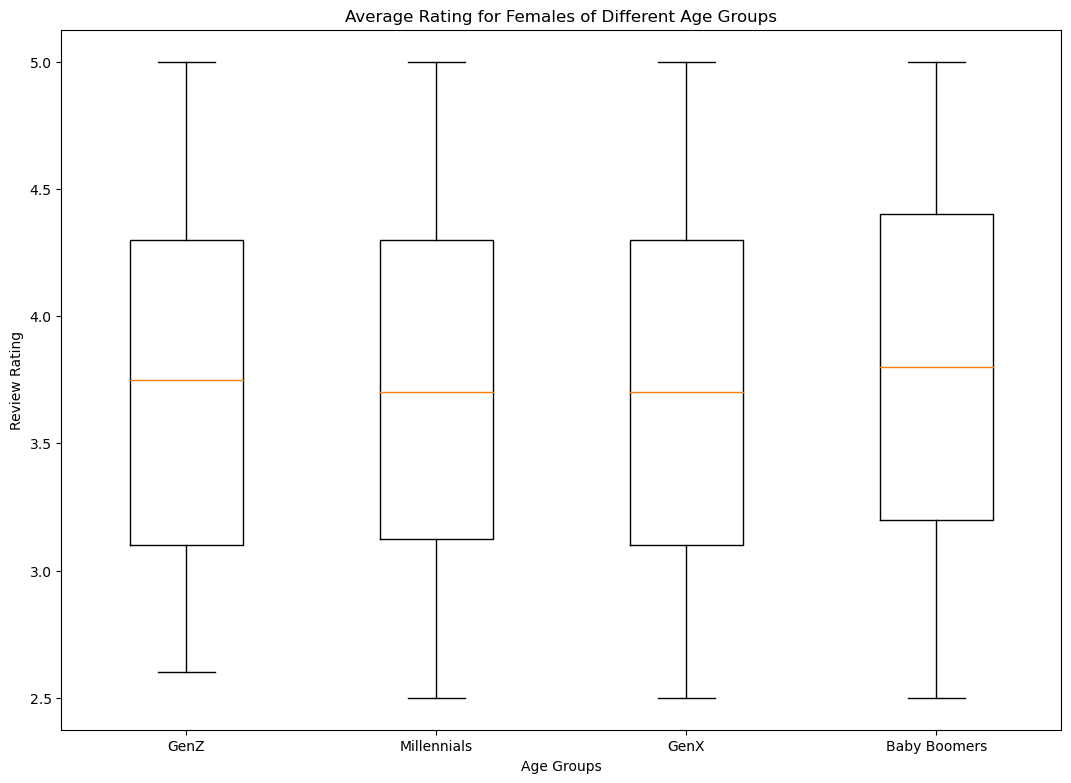

In [29]:
# Box and Whisker plot for Females of different Age Group and Review Rating
# Answers question 1: Is there a relationship between product rating and 
# demographic factors (age group and sex (male/female)?

# Establishing data to be plotted
data_1 = GenZ_female["Review Rating"]
data_2 = Mill_female["Review Rating"]
data_3 = GenX_female["Review Rating"]
data_4 = Baby_female["Review Rating"]
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize = (10,7))

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Average Rating for Females of Different Age Groups')
ax.set_ylabel('Review Rating')
ax.set_xlabel('Age Groups')

# Creating the plot
bp = ax.boxplot(data)
plt.xticks([1, 2, 3, 4], ['GenZ', 'Millennials', 'GenX', 'Baby Boomers'])

# Show plot
plt.show()

Analysis: Females within the Baby Boomers Age Group gave a higher Review Rating on average, while females within the Millennials Age Group gave the lowest Review Rating on average. Females within GenX Age Group gave an average Review Rating slightly higher than that of GenZ. 

In [30]:
## What type of clothing is purchased for each season work below this line ##

In [31]:
organized_df["Category"].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [32]:
organized_df.groupby(["Category"])["Season"].value_counts()

Category     Season
Accessories  Fall      324
             Summer    312
             Winter    303
             Spring    301
Clothing     Spring    454
             Winter    448
             Fall      427
             Summer    408
Footwear     Spring    163
             Summer    160
             Winter    140
             Fall      136
Outerwear    Fall       88
             Spring     81
             Winter     80
             Summer     75
Name: count, dtype: int64

In [33]:
#Locate categories of attire purchased solely during the "Fall" Season
fall_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Fall")])
                              
fall_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
6,7,63,Baby Boomer,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
10,11,53,Gen X,Male,Shoes,Footwear,34,Arkansas,L,Purple,Fall,4.1,Yes,Store Pickup,Yes,Yes,26,Bank Transfer,Bi-Weekly
24,25,18,Gen Z,Male,Jacket,Outerwear,22,Florida,M,Green,Fall,2.9,Yes,Store Pickup,Yes,Yes,16,Debit Card,Weekly
28,29,54,Gen X,Male,Handbag,Accessories,94,North Carolina,M,Gray,Fall,4.4,Yes,Free Shipping,Yes,Yes,41,PayPal,Every 3 Months
29,30,31,Millennials,Male,Dress,Clothing,48,Wyoming,S,Black,Fall,4.1,Yes,Store Pickup,Yes,Yes,14,Credit Card,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3876,3877,60,Baby Boomer,Female,Shoes,Footwear,85,Wisconsin,S,Cyan,Fall,2.6,No,2-Day Shipping,No,No,7,Cash,Annually
3882,3883,35,Millennials,Female,Pants,Clothing,95,North Dakota,L,Blue,Fall,2.6,No,Free Shipping,No,No,24,Cash,Fortnightly
3883,3884,34,Millennials,Female,Hat,Accessories,38,North Dakota,XL,Purple,Fall,4.0,No,Next Day Air,No,No,22,Cash,Fortnightly
3884,3885,47,Gen X,Female,Sandals,Footwear,29,Maryland,M,Brown,Fall,4.9,No,Express,No,No,3,PayPal,Weekly


In [34]:
# Filter the DataFrame down only to those columns to chart
fall_category = fall_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
fall_category_counts = fall_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
fall_category_counts = fall_category_counts.unstack()

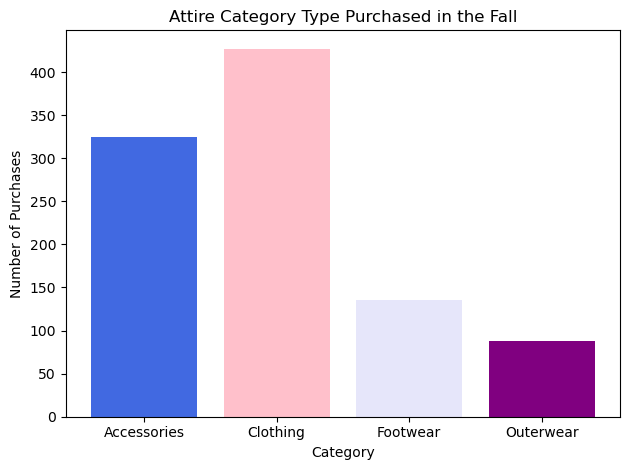

In [35]:
# Plot the data
color = ['royalblue','pink','lavender','purple']
fig, ax = plt.subplots()
ax.bar(fall_category_counts.T.index, fall_category_counts.T["Fall"], color = color)
plt.title("Attire Category Type Purchased in the Fall")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

Analysis: During the Fall, Clothing is purchased the most with over 400 purchases, and outerwear is purchased the least with just under 100 purchases. Accessories had the second highest number of purchases, while Footwear had roughly fifty more purchases than Outwear.

In [36]:
#Locate categories of attire purchased solely during the "Winter" Season
winter_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Winter")])
                              
winter_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
7,8,27,Millennials,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
11,12,30,Millennials,Male,Shorts,Clothing,68,Hawaii,S,Olive,Winter,4.9,Yes,Store Pickup,Yes,Yes,10,Bank Transfer,Fortnightly
12,13,61,Baby Boomer,Male,Coat,Outerwear,72,Delaware,M,Gold,Winter,4.5,Yes,Express,Yes,Yes,37,Venmo,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879,3880,26,Gen Z,Female,Skirt,Clothing,63,Florida,L,Maroon,Winter,4.1,No,Free Shipping,No,No,6,Debit Card,Quarterly
3880,3881,42,Millennials,Female,Shirt,Clothing,20,Massachusetts,M,Red,Winter,3.9,No,Free Shipping,No,No,40,PayPal,Monthly
3885,3886,49,Gen X,Female,Socks,Clothing,64,New Mexico,L,Purple,Winter,3.2,No,Free Shipping,No,No,39,Cash,Quarterly
3890,3891,35,Millennials,Female,Shirt,Clothing,81,Nebraska,XL,Green,Winter,2.6,No,Standard,No,No,33,Debit Card,Annually


In [37]:
# Filter the DataFrame down only to those columns to chart
winter_category = winter_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
winter_category_counts = winter_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
winter_category_counts = winter_category_counts.unstack()

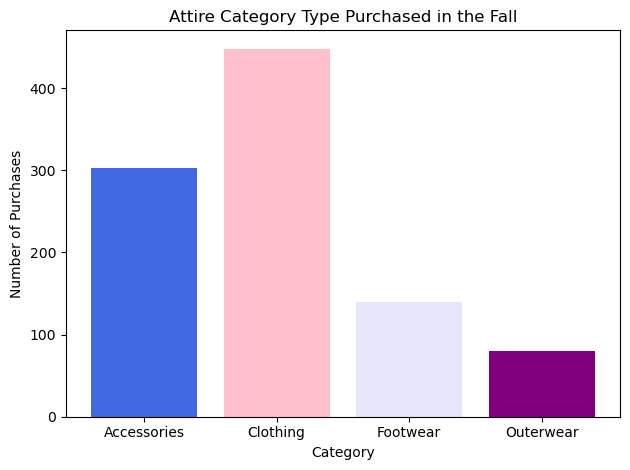

In [38]:
# Plot the data
color = ['royalblue','pink','lavender','purple']
fig, ax = plt.subplots()
ax.bar(winter_category_counts.T.index, winter_category_counts.T["Winter"], color = color)
plt.title("Attire Category Type Purchased in the Fall")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

Analysis: Similar to the Fall, during the Winter, Clothing is purchased the most with over 400 purchases, and outerwear is purchased the least with just under 100 purchases. Accessories had the second highest number of purchases, while Footwear had roughly fifty more purchases than Outwear.

In [39]:
#Locate categories of attire purchased solely during the "Spring" Season
spring_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Spring")])
                              
spring_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
9,10,57,Gen X,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly
13,14,65,Baby Boomer,Male,Dress,Clothing,51,New Hampshire,M,Violet,Spring,4.7,Yes,Express,Yes,Yes,31,PayPal,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,3890,57,Gen X,Female,Dress,Clothing,65,Alaska,S,Yellow,Spring,3.5,No,Express,No,No,49,Bank Transfer,Annually
3894,3895,66,Baby Boomer,Female,Skirt,Clothing,78,Connecticut,L,White,Spring,3.9,No,2-Day Shipping,No,No,44,Credit Card,Every 3 Months
3896,3897,52,Gen X,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Gen X,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly


In [40]:
# Filter the DataFrame down only to those columns to chart
spring_category = spring_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
spring_category_counts = spring_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
spring_category_counts = spring_category_counts.unstack()

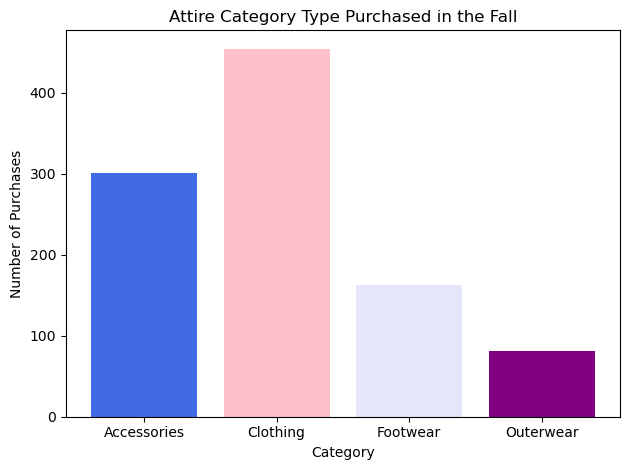

In [41]:
# Plot the data
color = ['royalblue','pink','lavender','purple']
fig, ax = plt.subplots()
ax.bar(spring_category_counts.T.index, spring_category_counts.T["Spring"], color = color)
plt.title("Attire Category Type Purchased in the Fall")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

Analysis: Similar to the Fall, during the Winter, Clothing is purchased the most with over 400 purchases, and outerwear is purchased the least with just under 100 purchases. Accessories had the second highest number of purchases, while Footwear had roughly fifty more purchases than Outwear.

In [42]:
#Locate categories of attire purchased solely during the "Summer" Season
summer_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Summer")])
                              
summer_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
5,6,46,Gen X,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
8,9,26,Gen Z,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
18,19,52,Gen X,Male,Sweater,Clothing,48,Montana,S,Black,Summer,4.6,Yes,Free Shipping,Yes,Yes,17,Cash,Weekly
19,20,66,Baby Boomer,Male,Pants,Clothing,90,Rhode Island,M,Green,Summer,3.3,Yes,Standard,Yes,Yes,46,Debit Card,Bi-Weekly
22,23,56,Gen X,Male,Pants,Clothing,37,California,M,Peach,Summer,3.2,Yes,Store Pickup,Yes,Yes,32,Debit Card,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3879,60,Baby Boomer,Female,Hat,Accessories,42,South Carolina,M,Pink,Summer,3.4,No,2-Day Shipping,No,No,24,Credit Card,Annually
3886,3887,37,Millennials,Female,Jewelry,Accessories,92,Iowa,S,Brown,Summer,3.9,No,Express,No,No,40,Debit Card,Quarterly
3892,3893,35,Millennials,Female,Jewelry,Accessories,86,Michigan,L,Indigo,Summer,3.5,No,Standard,No,No,5,PayPal,Fortnightly
3895,3896,40,Millennials,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly


In [43]:
# Filter the DataFrame down only to those columns to chart
summer_category = summer_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
summer_category_counts = summer_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
summer_category_counts = summer_category_counts.unstack()

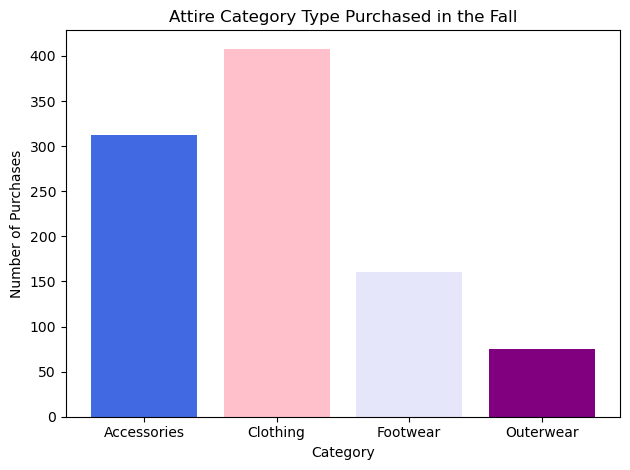

In [44]:
# Plot the data
color = ['royalblue','pink','lavender','purple']
fig, ax = plt.subplots()
ax.bar(summer_category_counts.T.index, summer_category_counts.T["Summer"], color = color)
plt.title("Attire Category Type Purchased in the Fall")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

Analysis: The Summer's Categories were roughly the same as the other three seasons, whereby Clothing is purchased the most with over 400 purchases, and outerwear is purchased the least with just under 100 purchases. Accessories had the second highest number of purchases, while Footwear came in third with over two times the number of purchases of Outwear.

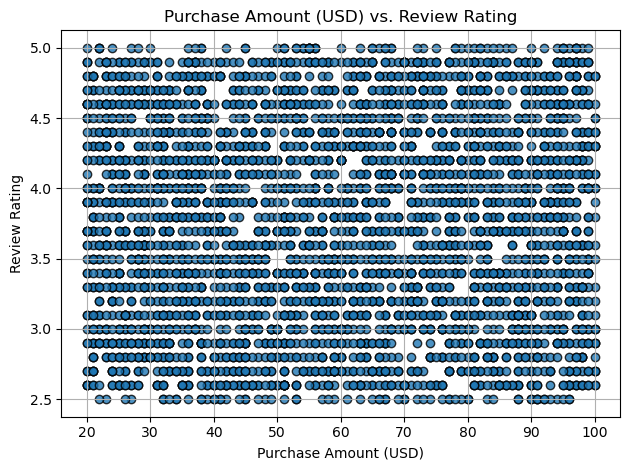

In [45]:
## Is there a relationship between review rating and purchase amount? ##

# Build the scatterplot for product rating and purchase amount
plt.scatter(organized_df["Purchase Amount (USD)"], organized_df["Review Rating"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Review Rating")
plt.title("Purchase Amount (USD) vs. Review Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

There is no relationship (no correlation) between Purchase Amount (USD) and Review Rating.

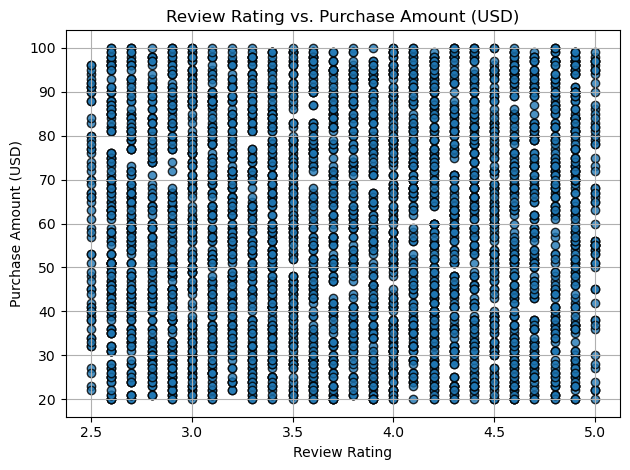

In [46]:
## Is there a relationship between purchase amount and review rating? ##

# Build the scatterplot for product rating and purchase amount
plt.scatter(organized_df["Review Rating"], organized_df["Purchase Amount (USD)"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Review Rating")
plt.ylabel("Purchase Amount (USD)")
plt.title("Review Rating vs. Purchase Amount (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

There is no relationship (no correlation) between review rating and purchase amount (USD).

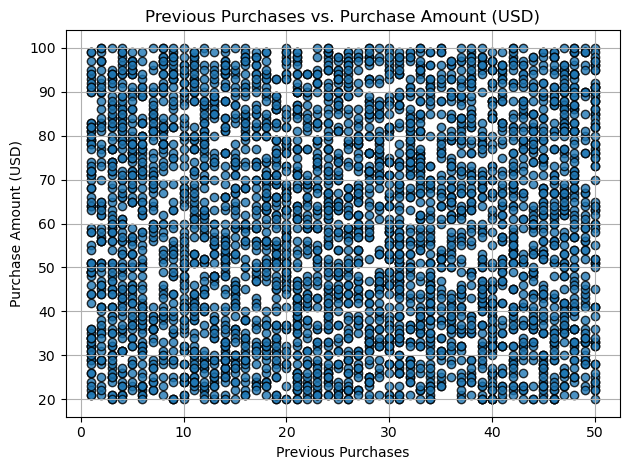

In [47]:
## Is there a relationship between Previous Purchases and number of Purchase Amount (USD)?

# Build the scatterplot for product rating and purchase amount
plt.scatter(organized_df["Previous Purchases"], organized_df["Purchase Amount (USD)"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Previous Purchases")
plt.ylabel("Purchase Amount (USD)")
plt.title("Previous Purchases vs. Purchase Amount (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

There is no relationship (no correlation) between Previous Purchases and Purchase Amount (USD).

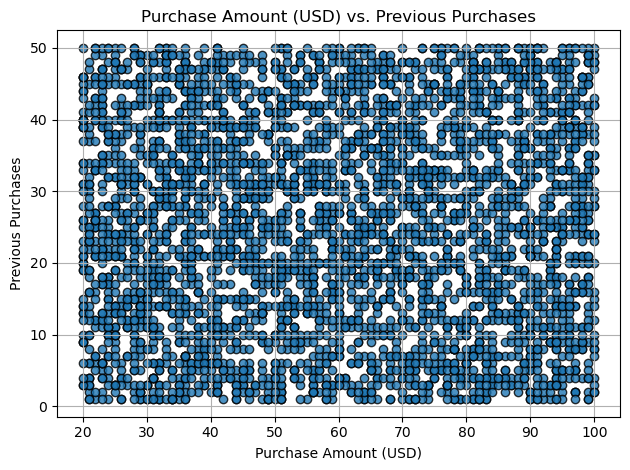

In [48]:
## Is there a relationship between Purchase Amount (USD) and number of Previous Purchases?

# Build the scatterplot for product rating and purchase amount
plt.scatter(organized_df["Purchase Amount (USD)"], organized_df["Previous Purchases"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Previous Purchases")
plt.title("Purchase Amount (USD) vs. Previous Purchases")
plt.grid(True)
plt.tight_layout()
plt.show()

There is no relationship (no correlation) between Purchase Amount (USD) and Previous Purchases.

## Which age demographic spends the most money?

In [49]:
average_spent_by_age_group = organized_df.groupby('Age Groups')['Purchase Amount (USD)'].mean().reset_index()
average_spent_by_age_group

,Age Groups,Purchase Amount (USD)
0,Gen Z,60.690625
1,Millennials,59.390833
2,Gen X,59.808176
3,Baby Boomer,59.510152


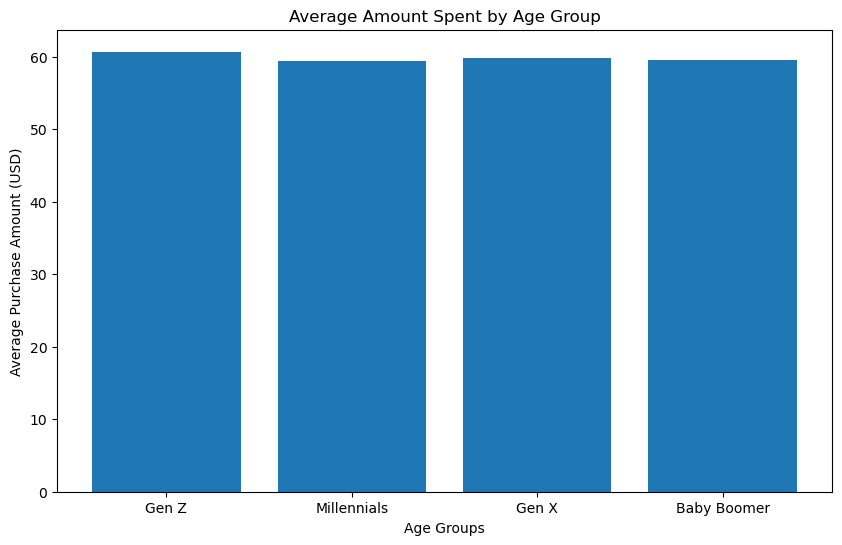

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(average_spent_by_age_group['Age Groups'], average_spent_by_age_group["Purchase Amount (USD)"])
plt.xlabel('Age Groups')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Average Amount Spent by Age Group')
plt.show()

Based on our findings, we can conclude that all age groups spend roughly the same amount, however Gen Z has a slight advantage over the other three age groups.

In [51]:
organized_df["Age Groups"].value_counts()

Age Groups
Gen X          1272
Millennials    1200
Baby Boomer     788
Gen Z           640
Name: count, dtype: int64

## How frequently do specific age demographics shop? (bi-weekly, bi-monthly, ect)

In [52]:
shopping_frequency = organized_df.pivot_table(index='Frequency of Purchases', columns='Age Groups', aggfunc='size', fill_value=0)
shopping_frequency

Age Groups,Gen Z,Millennials,Gen X,Baby Boomer
Frequency of Purchases,,,,
Annually,102,169,170,131
Bi-Weekly,99,165,184,99
Every 3 Months,100,186,185,113
Fortnightly,94,164,180,104
Monthly,80,179,189,105
Quarterly,89,161,185,128
Weekly,76,176,179,108


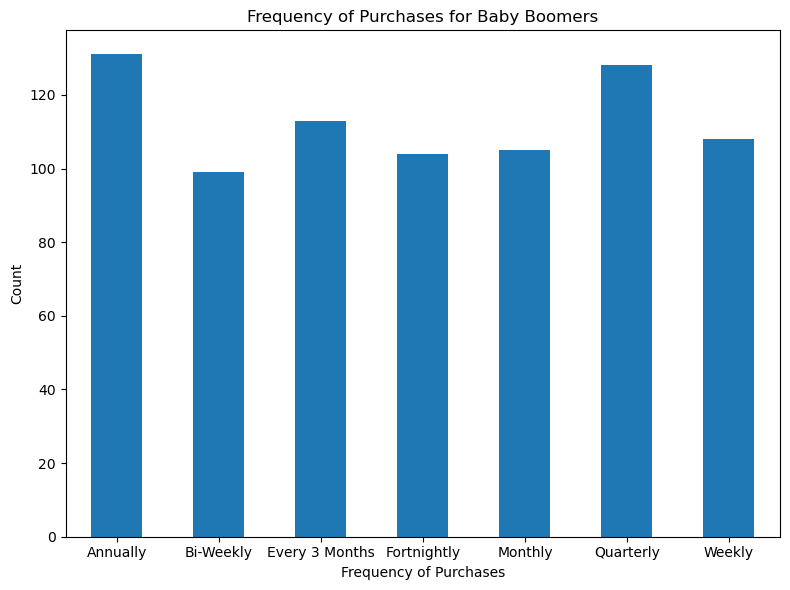

In [53]:
baby_boomer_data = shopping_frequency.loc[:, 'Baby Boomer']
plt.figure(figsize=(8, 6))
baby_boomer_data.plot(kind='bar')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases for Baby Boomers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Baby Boomers's most often frequency of purchase appears to be annually (once a year), while their least frequency of purchase is bi-weekly (twice a week).

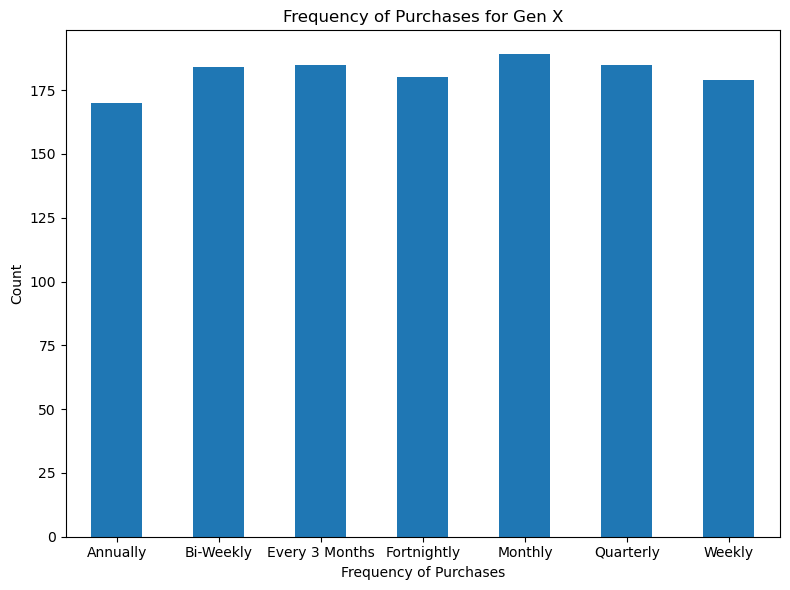

In [54]:
gen_x_data = shopping_frequency.loc[:, 'Gen X']
plt.figure(figsize=(8, 6))
gen_x_data.plot(kind='bar')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases for Gen X')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Gen X's most often frequency of purchase appears to be monthly (once a month), while their least frequency of purchase is anually (once a year).

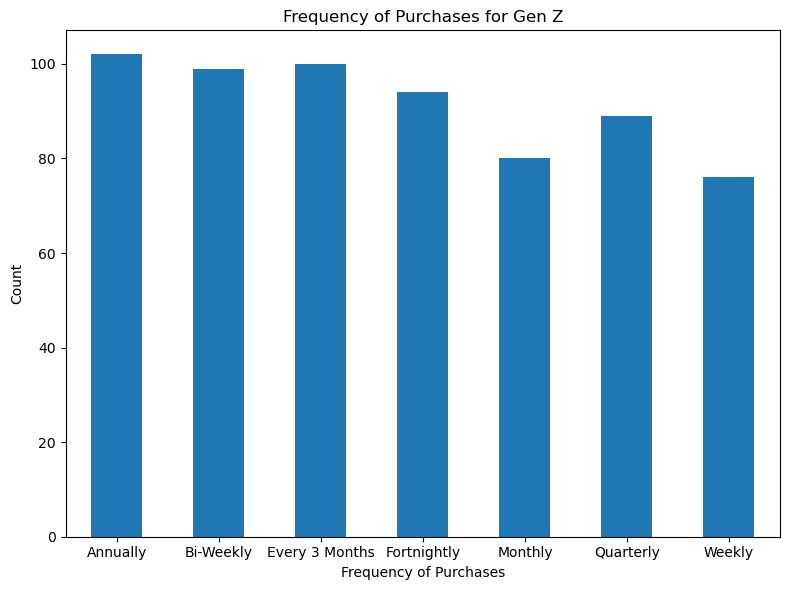

In [55]:
gen_z_data = shopping_frequency.loc[:, 'Gen Z']
plt.figure(figsize=(8, 6))
gen_z_data.plot(kind='bar')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases for Gen Z')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Gen Z's most often frequency of purchase appears to be annually (once a year), while their least frequency of purchase is weekly (once a week).

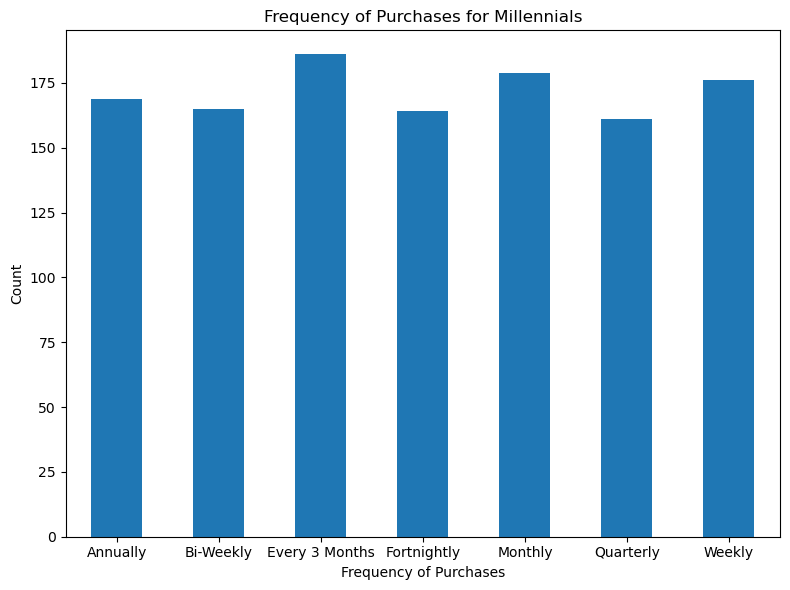

In [56]:
millennial_data = shopping_frequency.loc[:, 'Millennials']
plt.figure(figsize=(8, 6))
millennial_data.plot(kind='bar')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases for Millennials')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Millennials's most often frequency of purchase appears to be every 3 months, while their least frequency of purchase is quarterly (four times a year).

In [57]:
frequency_counts = organized_df['Frequency of Purchases'].value_counts().reset_index()
frequency_counts.columns = ['Frequency of Purchases', 'Count']
print(frequency_counts)

  Frequency of Purchases  Count
0         Every 3 Months    584
1               Annually    572
2              Quarterly    563
3                Monthly    553
4              Bi-Weekly    547
5            Fortnightly    542
6                 Weekly    539


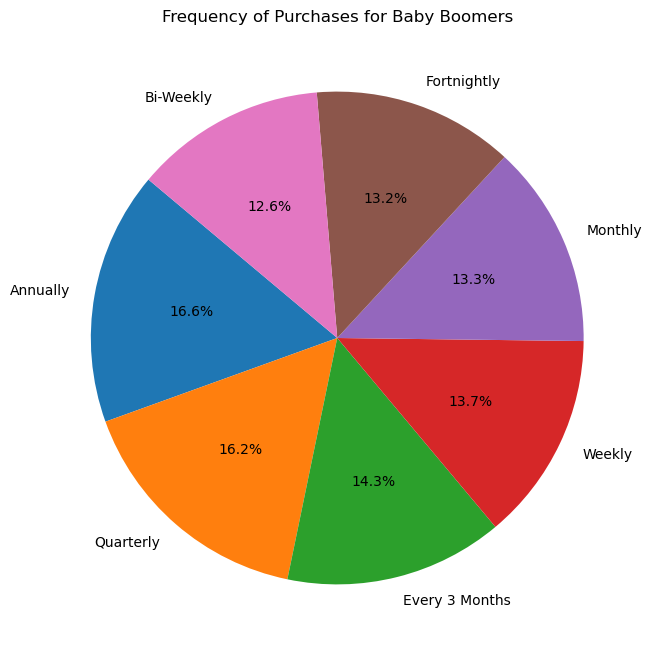

In [58]:
baby_boomers_df = organized_df[shopping_df['Age Groups'] == 'Baby Boomer']
baby_boomers_frequency_counts = baby_boomers_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(baby_boomers_frequency_counts, labels=baby_boomers_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases for Baby Boomers')
plt.show()

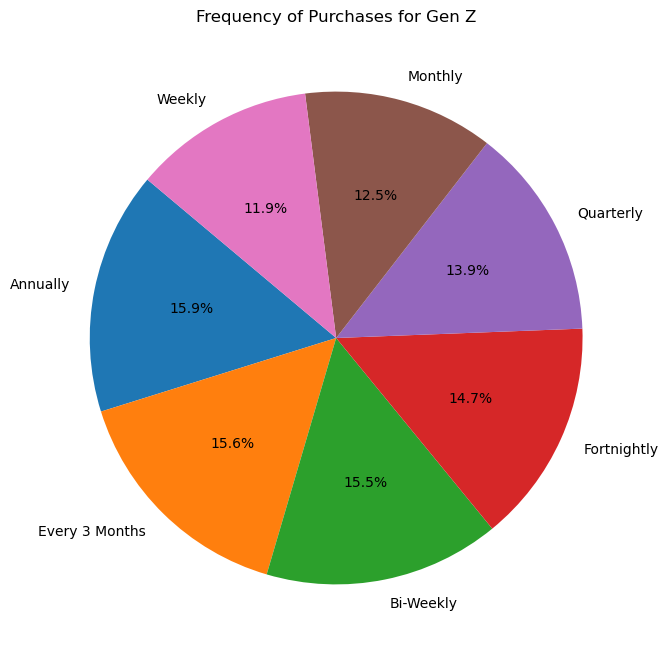

In [59]:
gen_z_df = organized_df[organized_df['Age Groups'] == 'Gen Z']
gen_z_frequency_counts = gen_z_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gen_z_frequency_counts, labels=gen_z_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases for Gen Z')
plt.show()

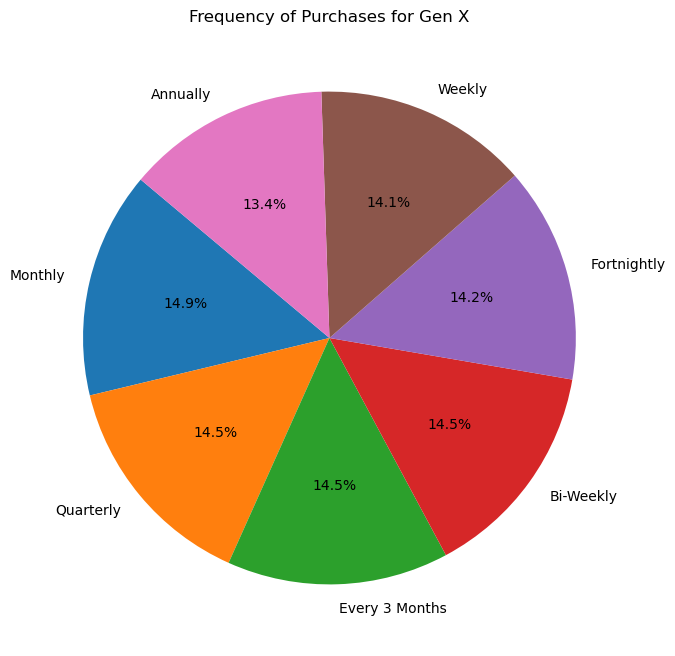

In [60]:
gen_x_df = organized_df[organized_df['Age Groups'] == 'Gen X']
gen_x_frequency_counts = gen_x_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gen_x_frequency_counts, labels=gen_x_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases for Gen X')
plt.show()

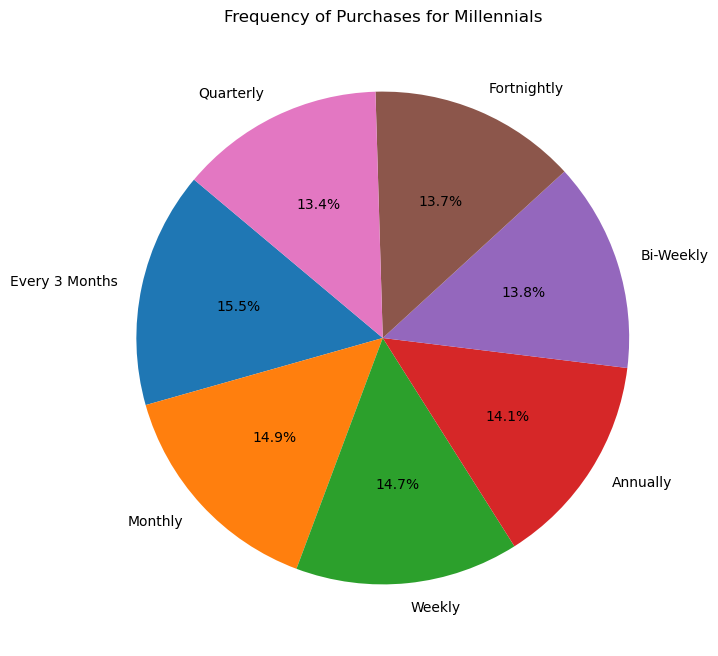

In [61]:
millennial_df = organized_df[organized_df['Age Groups'] == 'Millennials']
millennial_frequency_counts = millennial_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(millennial_frequency_counts, labels=millennial_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases for Millennials')
plt.show()

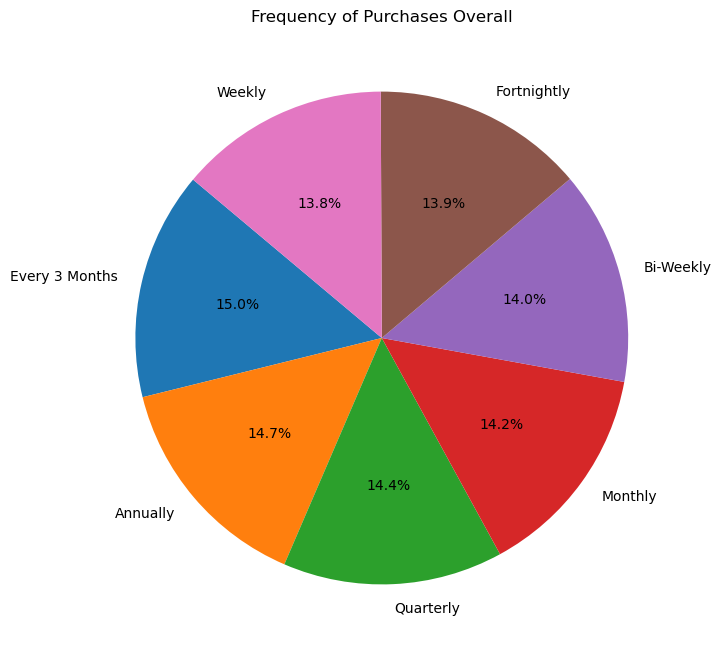

In [62]:
overall_frequency_counts = organized_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(overall_frequency_counts, labels=overall_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases Overall')
plt.show()

Overall, across all customers combined, the most frequent frequency of purchase is every 3 months, while the least frequent frequency of purchase is weekly (once a week).

## Is there a correlation between the color of clothes purchased and the season? 

In [63]:
GenZ_male["Color"]

1757    Yellow
1266     Peach
1977      Teal
392      Black
1349     Black
         ...  
1985      Gold
2177     Green
2251      Gold
1520     Brown
16        Gray
Name: Color, Length: 198, dtype: object

In [64]:
organized_df["Age Groups"]

0             Gen X
1             Gen Z
2             Gen X
3             Gen Z
4             Gen X
           ...     
3895    Millennials
3896          Gen X
3897          Gen X
3898          Gen X
3899          Gen X
Name: Age Groups, Length: 3900, dtype: category
Categories (4, object): ['Gen Z' < 'Millennials' < 'Gen X' < 'Baby Boomer']

In [65]:
organized_df["Color"]

0            Gray
1          Maroon
2          Maroon
3          Maroon
4       Turquoise
          ...    
3895    Turquoise
3896        White
3897        Green
3898        Brown
3899        Beige
Name: Color, Length: 3900, dtype: object

In [66]:
organized_df['Color'].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

In [67]:
color_data = organized_df['Color']

color_organized_df = pd.DataFrame(color_data)

def classify_text(color_data):
    if color_data in ['Gray', 'Silver', 'Beige']:
        return 'Gray'
    elif color_data in ['Red', 'Maroon']:
        return 'Red'
    elif color_data in ['Blue', 'Teal', 'Cyan', 'Turquoise']:
        return 'Blue'
    elif color_data in ['White']:
        return 'White'
    elif color_data in ['Black', 'Charcoal']:
        return 'Black'
    elif color_data in ['Pink', 'Magenta']:
        return 'Pink'
    elif color_data in ['Purple', 'Violet', 'Lavender', 'Indigo']:
        return 'Purple'
    elif color_data in ['Green', 'Olive']:
        return 'Green'
    elif color_data in ['Yellow', 'Gold']:
        return 'Yellow'
    elif color_data in ['Orange', 'Peach']:
        return 'Orange'
    else:
        return 'Brown'
organized_df['Color Classifications'] = color_data.apply(classify_text) 

color_organized_df = organized_df[["Customer ID", "Age", "Age Groups", "Gender", 
                            "Item Purchased", "Category", "Purchase Amount (USD)", 
                            "Location", "Size", "Color", "Color Classifications", "Season", "Review Rating", 
                            "Subscription Status", "Shipping Type", "Discount Applied", 
                            "Promo Code Used", "Previous Purchases", "Payment Method", 
                            "Frequency of Purchases"]]
color_organized_df


C:\Users\Sarah Schilling\AppData\Local\Temp\ipykernel_14240\3838177882.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organized_df['Color Classifications'] = color_data.apply(classify_text)


,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Color Classifications,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Red,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Red,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Red,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Blue,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Millennials,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Blue,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Gen X,Female,Backpack,Accessories,49,Iowa,L,White,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Gen X,Female,Belt,Accessories,33,New Jersey,L,Green,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Gen X,Female,Shoes,Footwear,77,Minnesota,S,Brown,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [68]:
# Determine the most frequently purchased item color overall
color_frequency_counts = color_organized_df['Color Classifications'].value_counts().reset_index()
color_frequency_counts.columns = ['Color Classifications', 'Count']
print(color_frequency_counts)

   Color Classifications  Count
0                   Blue    635
1                 Purple    611
2                   Gray    479
3                  Green    346
4                  Black    320
5                 Yellow    312
6                    Red    306
7                   Pink    305
8                 Orange    303
9                  White    142
10                 Brown    141


In [69]:
# Color preference by age demographic
color_preference = color_organized_df.pivot_table(index='Color Classifications', columns='Age Groups', aggfunc='size', fill_value=0)
color_preference

Age Groups,Gen Z,Millennials,Gen X,Baby Boomer
Color Classifications,,,,
Black,53,88,110,69
Blue,109,163,232,131
Brown,18,56,40,27
Gray,75,143,156,105
Green,64,105,111,66
Orange,48,103,92,60
Pink,51,105,99,50
Purple,90,191,199,131
Red,55,100,105,46


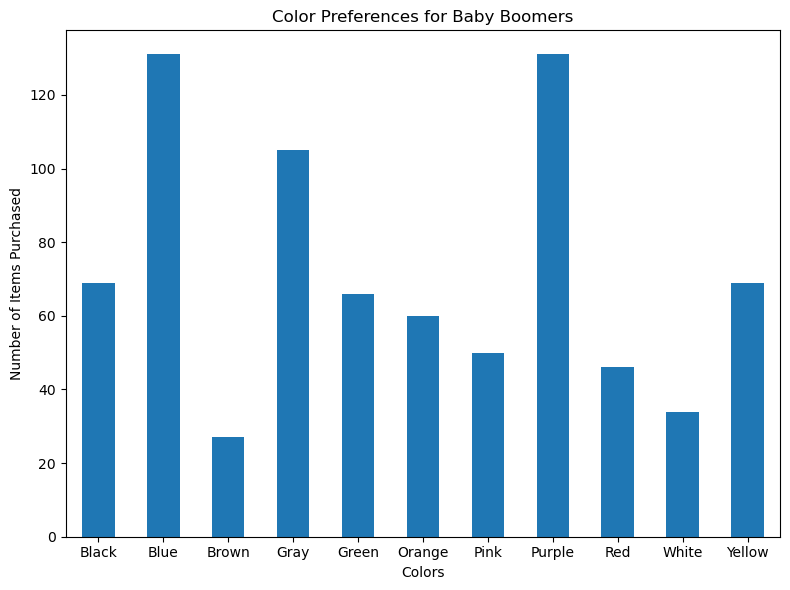

In [70]:
# Plot the numbers of items purchased for each color for the Baby Boomer generation
colors = ['black', 'blue', 'brown', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow']
baby_boomer_data = color_preference.loc[:, 'Baby Boomer']
plt.figure(figsize=(8, 6),)
#ax.bar(baby_boomer_data.T.index, baby_boomer_da.T["Fall"], color = color)
baby_boomer_data.plot(kind='bar')
plt.xlabel('Colors')
plt.ylabel('Number of Items Purchased')
plt.title('Color Preferences for Baby Boomers')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()

Blue and purple were the most popular colors and brown and white were the least among Baby Boomers.

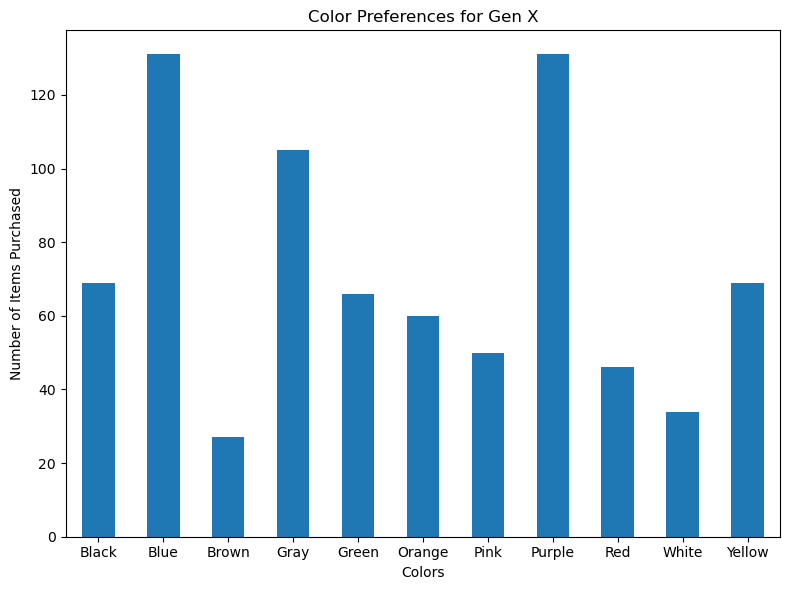

In [71]:
# Plot the numbers of items purchased for each color for the Gen X generation
Gen_X_data = color_preference.loc[:, 'Gen X']
plt.figure(figsize=(8, 6))
baby_boomer_data.plot(kind='bar')
plt.xlabel('Colors')
plt.ylabel('Number of Items Purchased')
plt.title('Color Preferences for Gen X')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()

Blue and purple were the most popular colors and brown and white were the least among Gen X.

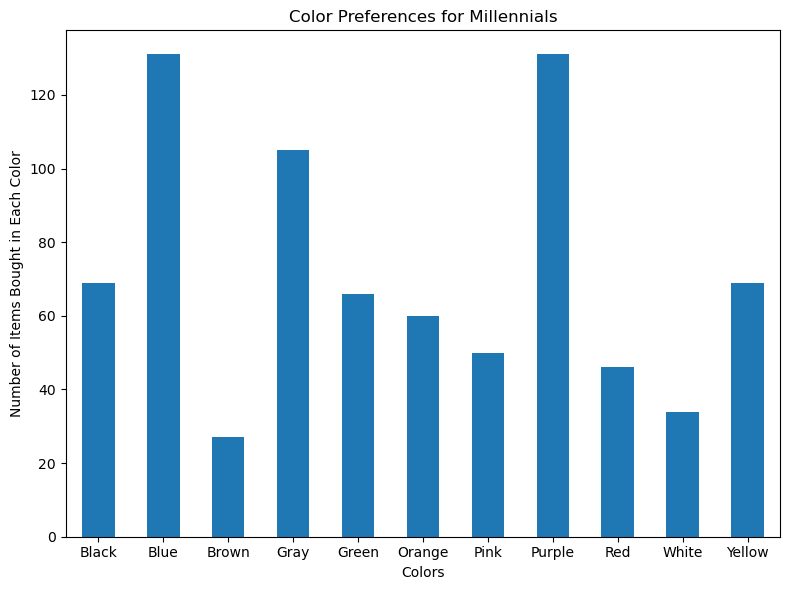

In [72]:
# Plot the numbers of items purchased for each color for the Milennial generation
Millennial_data = color_preference.loc[:, 'Millennials']
plt.figure(figsize=(8, 6))
baby_boomer_data.plot(kind='bar')
plt.xlabel('Colors')
plt.ylabel('Number of Items Bought in Each Color')
plt.title('Color Preferences for Millennials')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()

Blue and purple were the most popular colors and brown and white were the least among millennials.

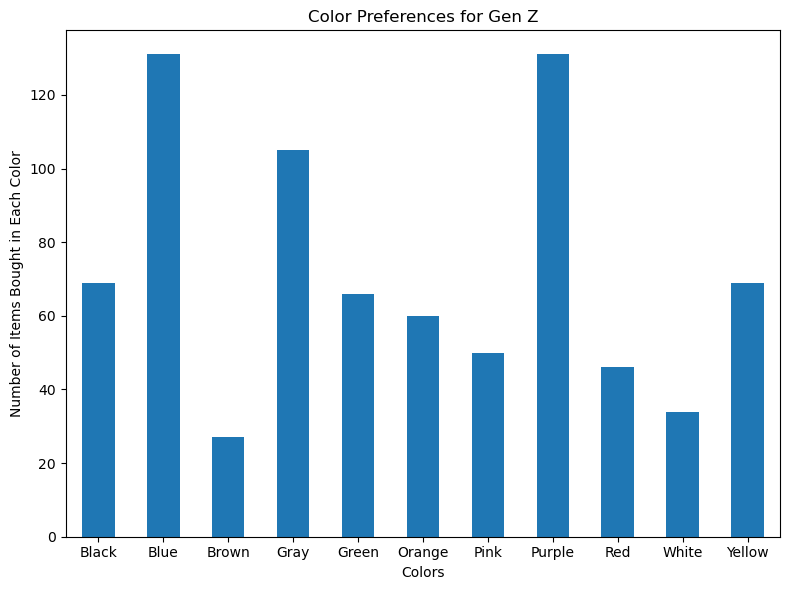

In [73]:
# Determine the frequency of color item purchases for Gen Z
Gen_Z_data = color_preference.loc[:, 'Gen Z']
plt.figure(figsize=(8, 6))
baby_boomer_data.plot(kind='bar')
plt.xlabel('Colors')
plt.ylabel('Number of Items Bought in Each Color')
plt.title('Color Preferences for Gen Z')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()

Blue and purple were the most popular colors and brown and white were the least among Gen Z.

In [74]:
# Percentage of Black
black_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Black"].shape[0]
total_count = len(organized_df["Color Classifications"])
black_percent = (black_count/total_count) * 100
print(black_percent)

# Percentage of Blue
blue_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Blue"].shape[0]
total_count = len(organized_df["Color Classifications"])
blue_percent = (blue_count/total_count) * 100

# Percentage of Brown
brown_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Brown"].shape[0]
total_count = len(organized_df["Color Classifications"])
brown_percent = (brown_count/total_count) * 100

# Percentage of Gray
gray_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Gray"].shape[0]
total_count = len(organized_df["Color Classifications"])
gray_percent = (gray_count/total_count) * 100

# Percentage of Gray
green_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Green"].shape[0]
total_count = len(organized_df["Color Classifications"])
green_percent = (green_count/total_count) * 100

# Percentage of Orange
orange_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Orange"].shape[0]
total_count = len(organized_df["Color Classifications"])
orange_percent = (orange_count/total_count) * 100

# Percentage of Pink
pink_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Pink"].shape[0]
total_count = len(organized_df["Color Classifications"])
pink_percent = (pink_count/total_count) * 100

# Percentage of Purple
purple_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Purple"].shape[0]
total_count = len(organized_df["Color Classifications"])
purple_percent = (purple_count/total_count) * 100

# Percentage of Red
red_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Red"].shape[0]
total_count = len(organized_df["Color Classifications"])
red_percent = (red_count/total_count) * 100

# Percentage of White
white_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "White"].shape[0]
total_count = len(organized_df["Color Classifications"])
white_percent = (white_count/total_count) * 100

# Percentage of Yellow
yellow_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Yellow"].shape[0]
total_count = len(organized_df["Color Classifications"])
yellow_percent = (yellow_count/total_count) * 100

8.205128205128204


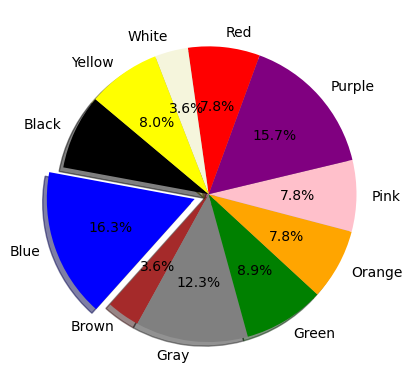

In [75]:
# Establish data for the pie chart
labels = ["Black", "Blue", "Brown", "Gray", "Green", "Orange", "Pink", "Purple", "Red", "White", "Yellow"]
sizes = [black_percent, blue_percent, brown_percent, gray_percent, green_percent, orange_percent, pink_percent, purple_percent, red_percent, white_percent, yellow_percent]
colors = ['black', 'blue', 'brown', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

This pie chart serves to portray the relative percentages of each color to be purchased by the sample overall. Further, according to the chart, blue and purple are the most common colors to be purchased, and white and brown are the least.

## What type of color item is purchased most for each season?

In [76]:
color_organized_df.groupby(["Color Classifications"])["Season"].value_counts()

Color Classifications  Season
Black                  Spring     85
                       Winter     83
                       Summer     78
                       Fall       74
Blue                   Summer    173
                       Spring    168
                       Winter    152
                       Fall      142
Brown                  Winter     40
                       Fall       35
                       Summer     33
                       Spring     33
Gray                   Summer    136
                       Spring    124
                       Fall      117
                       Winter    102
Green                  Winter     93
                       Spring     90
                       Fall       84
                       Summer     79
Orange                 Fall       87
                       Winter     78
                       Spring     77
                       Summer     61
Pink                   Fall       85
                       Spring     81
        

In [77]:
#Locate categories of attire purchased solely during the "Fall" Season
fall_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Fall")])
                              
fall_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Color Classifications
6,7,63,Baby Boomer,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly,Gray
10,11,53,Gen X,Male,Shoes,Footwear,34,Arkansas,L,Purple,Fall,4.1,Yes,Store Pickup,Yes,Yes,26,Bank Transfer,Bi-Weekly,Purple
24,25,18,Gen Z,Male,Jacket,Outerwear,22,Florida,M,Green,Fall,2.9,Yes,Store Pickup,Yes,Yes,16,Debit Card,Weekly,Green
28,29,54,Gen X,Male,Handbag,Accessories,94,North Carolina,M,Gray,Fall,4.4,Yes,Free Shipping,Yes,Yes,41,PayPal,Every 3 Months,Gray
29,30,31,Millennials,Male,Dress,Clothing,48,Wyoming,S,Black,Fall,4.1,Yes,Store Pickup,Yes,Yes,14,Credit Card,Weekly,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3876,3877,60,Baby Boomer,Female,Shoes,Footwear,85,Wisconsin,S,Cyan,Fall,2.6,No,2-Day Shipping,No,No,7,Cash,Annually,Blue
3882,3883,35,Millennials,Female,Pants,Clothing,95,North Dakota,L,Blue,Fall,2.6,No,Free Shipping,No,No,24,Cash,Fortnightly,Blue
3883,3884,34,Millennials,Female,Hat,Accessories,38,North Dakota,XL,Purple,Fall,4.0,No,Next Day Air,No,No,22,Cash,Fortnightly,Purple
3884,3885,47,Gen X,Female,Sandals,Footwear,29,Maryland,M,Brown,Fall,4.9,No,Express,No,No,3,PayPal,Weekly,Brown


In [78]:
# Filter the DataFrame down only to those columns to chart
fall_color = fall_df[["Season", "Color Classifications"]]

# Group by "Season" and "Category" and count the occurrences
fall_color_counts = fall_color.groupby(["Season", "Color Classifications"]).size()

# Reshape the data to have "Season" as rows and "Color Classifications" as columns
fall_color_counts = fall_color_counts.unstack()

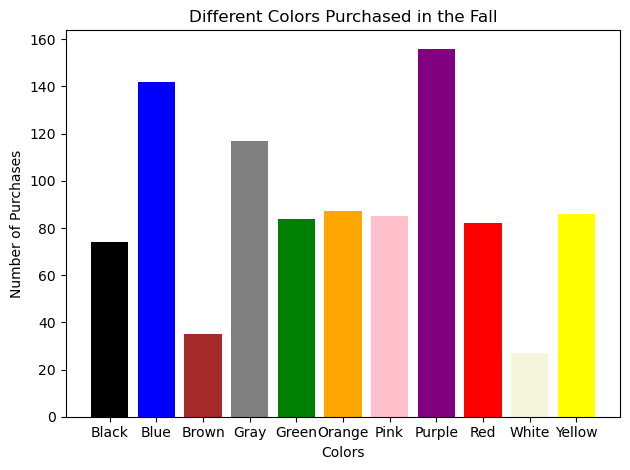

In [79]:
# Plot the data
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
fig, ax = plt.subplots()
ax.bar(fall_color_counts.T.index, fall_color_counts.T["Fall"], color = color)
plt.title("Different Colors Purchased in the Fall")
plt.xlabel("Colors")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

This bar graph portrays the amount of times each color was purchased in the Fall. According to the graph, blue and purple were overwhelimingly the most popular colors to purchase with brown and white being the least.

In [80]:
#Locate categories of attire purchased solely during the "Winter" Season
winter_df = pd.DataFrame(color_organized_df.loc[(color_organized_df["Season"] == "Winter")])
                              
winter_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Color Classifications,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Red,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
7,8,27,Millennials,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Black,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
11,12,30,Millennials,Male,Shorts,Clothing,68,Hawaii,S,Olive,Green,Winter,4.9,Yes,Store Pickup,Yes,Yes,10,Bank Transfer,Fortnightly
12,13,61,Baby Boomer,Male,Coat,Outerwear,72,Delaware,M,Gold,Yellow,Winter,4.5,Yes,Express,Yes,Yes,37,Venmo,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879,3880,26,Gen Z,Female,Skirt,Clothing,63,Florida,L,Maroon,Red,Winter,4.1,No,Free Shipping,No,No,6,Debit Card,Quarterly
3880,3881,42,Millennials,Female,Shirt,Clothing,20,Massachusetts,M,Red,Red,Winter,3.9,No,Free Shipping,No,No,40,PayPal,Monthly
3885,3886,49,Gen X,Female,Socks,Clothing,64,New Mexico,L,Purple,Purple,Winter,3.2,No,Free Shipping,No,No,39,Cash,Quarterly
3890,3891,35,Millennials,Female,Shirt,Clothing,81,Nebraska,XL,Green,Green,Winter,2.6,No,Standard,No,No,33,Debit Card,Annually


In [81]:
# Filter the DataFrame down only to those columns to chart
winter_color = winter_df[["Season", "Color Classifications"]]

# Group by "Season" and "Category" and count the occurrences
winter_color_counts = winter_color.groupby(["Season", "Color Classifications"]).size()

# Reshape the data to have "Season" as rows and "Color Classifications" as columns
winter_color_counts = winter_color_counts.unstack()

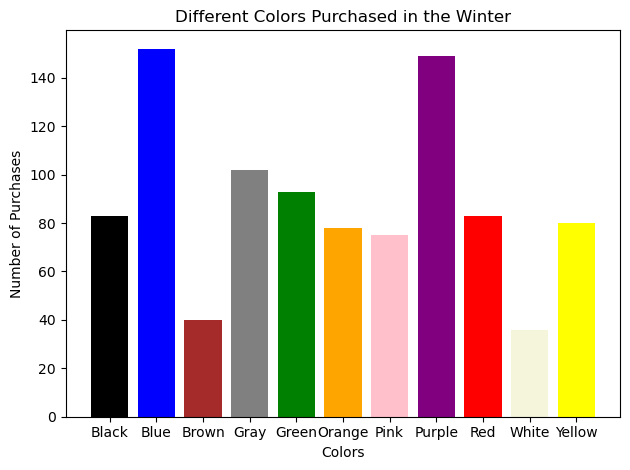

In [82]:
# Plot the data
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
fig, ax = plt.subplots()
ax.bar(winter_color_counts.T.index, winter_color_counts.T["Winter"], color = color)
plt.title("Different Colors Purchased in the Winter")
plt.xlabel("Colors")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

This bar graph portrays the amount of times each color was purchased in the Winter. According to the graph, blue and purple were overwhelimingly the most popular colors to purchase with brown and white being the least. 

In [83]:
#Locate categories of attire purchased solely during the "Spring" Season
spring_df = pd.DataFrame(color_organized_df.loc[(color_organized_df["Season"] == "Spring")])
                              
spring_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Color Classifications,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Red,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Red,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Blue,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
9,10,57,Gen X,Male,Handbag,Accessories,31,Missouri,M,Pink,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly
13,14,65,Baby Boomer,Male,Dress,Clothing,51,New Hampshire,M,Violet,Purple,Spring,4.7,Yes,Express,Yes,Yes,31,PayPal,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,3890,57,Gen X,Female,Dress,Clothing,65,Alaska,S,Yellow,Yellow,Spring,3.5,No,Express,No,No,49,Bank Transfer,Annually
3894,3895,66,Baby Boomer,Female,Skirt,Clothing,78,Connecticut,L,White,White,Spring,3.9,No,2-Day Shipping,No,No,44,Credit Card,Every 3 Months
3896,3897,52,Gen X,Female,Backpack,Accessories,49,Iowa,L,White,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Gen X,Female,Belt,Accessories,33,New Jersey,L,Green,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly


In [84]:
# Filter the DataFrame down only to those columns to chart
spring_color = spring_df[["Season", "Color Classifications"]]

# Group by "Season" and "Color Classifications" and count the occurrences
spring_color_counts = spring_color.groupby(["Season", "Color Classifications"]).size()

# Reshape the data to have "Season" as rows and "Color Classifications" as columns
spring_color_counts = spring_color_counts.unstack()

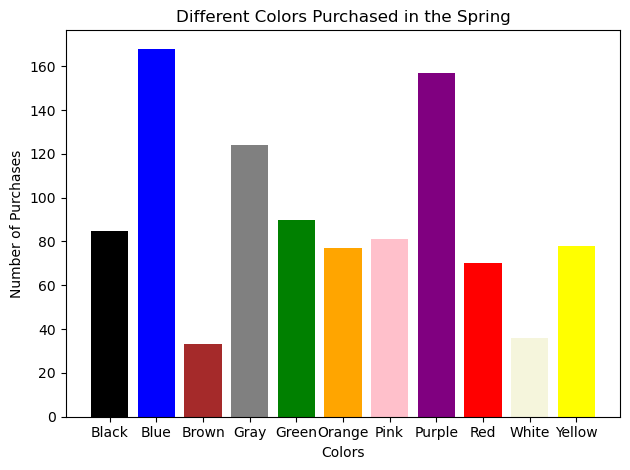

In [85]:
# Plot the data
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
fig, ax = plt.subplots()
ax.bar(spring_color_counts.T.index, spring_color_counts.T["Spring"], color = color)
plt.title("Different Colors Purchased in the Spring")
plt.xlabel("Colors")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

This bar graph portrays the amount of times each color was purchased in the Spring. According to the graph, blue and purple were overwheliming the most popular colors to purchase with brown and white being the least. 

In [86]:
#Locate categories of attire purchased solely during the "Summer" Season
summer_df = pd.DataFrame(color_organized_df.loc[(color_organized_df["Season"] == "Summer")])
                              
summer_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Color Classifications,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
5,6,46,Gen X,Male,Sneakers,Footwear,20,Wyoming,M,White,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
8,9,26,Gen Z,Male,Coat,Outerwear,97,West Virginia,L,Silver,Gray,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
18,19,52,Gen X,Male,Sweater,Clothing,48,Montana,S,Black,Black,Summer,4.6,Yes,Free Shipping,Yes,Yes,17,Cash,Weekly
19,20,66,Baby Boomer,Male,Pants,Clothing,90,Rhode Island,M,Green,Green,Summer,3.3,Yes,Standard,Yes,Yes,46,Debit Card,Bi-Weekly
22,23,56,Gen X,Male,Pants,Clothing,37,California,M,Peach,Orange,Summer,3.2,Yes,Store Pickup,Yes,Yes,32,Debit Card,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3879,60,Baby Boomer,Female,Hat,Accessories,42,South Carolina,M,Pink,Pink,Summer,3.4,No,2-Day Shipping,No,No,24,Credit Card,Annually
3886,3887,37,Millennials,Female,Jewelry,Accessories,92,Iowa,S,Brown,Brown,Summer,3.9,No,Express,No,No,40,Debit Card,Quarterly
3892,3893,35,Millennials,Female,Jewelry,Accessories,86,Michigan,L,Indigo,Purple,Summer,3.5,No,Standard,No,No,5,PayPal,Fortnightly
3895,3896,40,Millennials,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Blue,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly


In [87]:
# Filter the DataFrame down only to those columns to chart
summer_color = summer_df[["Season", "Color Classifications"]]

# Group by "Season" and "Color Classifications" and count the occurrences
summer_color_counts = summer_color.groupby(["Season", "Color Classifications"]).size()

# Reshape the data to have "Season" as rows and "Class Classifications" as columns
summer_color_counts = summer_color_counts.unstack()

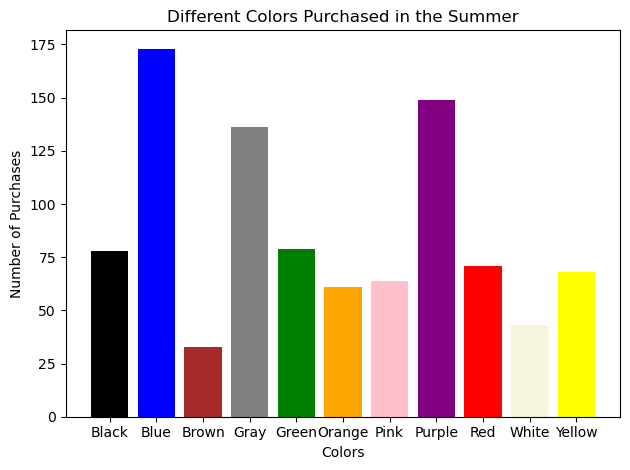

In [88]:
# Plot the data
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
fig, ax = plt.subplots()
ax.bar(summer_color_counts.T.index, summer_color_counts.T["Summer"], color = color)
plt.title("Different Colors Purchased in the Summer")
plt.xlabel("Colors")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

This bar graph portrays the amount of times each color was purchased in the Summer According to the graph, blue and purple were overwheliming the most popular colors to purchase with brown and white being the least. 

In [89]:
# Filter the DataFrame down only to those columns to chart
rating_color = color_organized_df[["Color Classifications", "Review Rating"]]

# Group by "Season" and "Color Classifications" and count the occurrences
rating_color_counts = rating_color.groupby(["Color Classifications", "Review Rating"]).size()

# Reshape the data to have "Color Classifications" as rows and "Review Ratings" as columns
rating_color_counts = rating_color_counts.unstack()

# Calculate the average for each color across the rows
sum_rating_color = rating_color_counts.sum(axis='columns')

print(sum_rating_color)
rating_color_counts
color_organized_df

Color Classifications
Black     320.0
Blue      635.0
Brown     141.0
Gray      479.0
Green     346.0
Orange    303.0
Pink      305.0
Purple    611.0
Red       306.0
White     142.0
Yellow    312.0
dtype: float64


,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Color Classifications,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Red,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Red,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Red,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Blue,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Millennials,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Blue,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Gen X,Female,Backpack,Accessories,49,Iowa,L,White,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Gen X,Female,Belt,Accessories,33,New Jersey,L,Green,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Gen X,Female,Shoes,Footwear,77,Minnesota,S,Brown,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


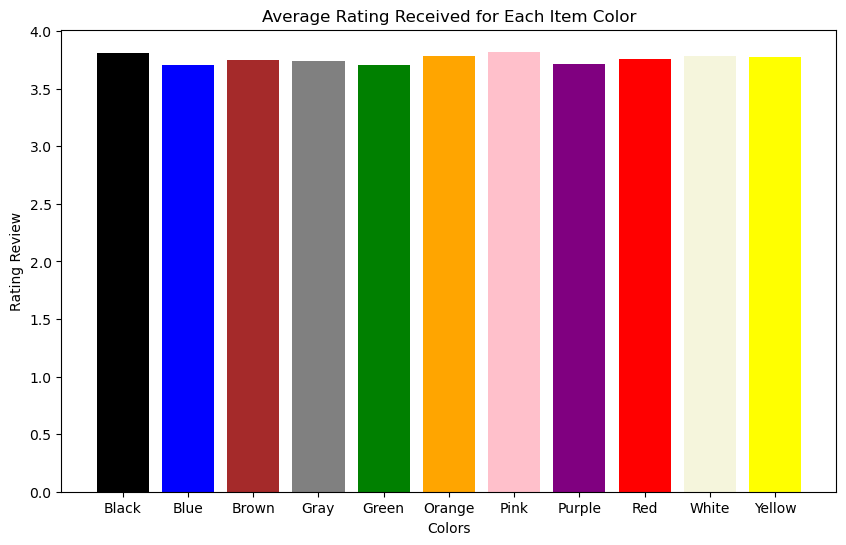

In [90]:
# Plot the average rating review received for each item color 
average_review_by_color = color_organized_df.groupby('Color Classifications')['Review Rating'].mean().reset_index()
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
plt.figure(figsize=(10, 6))
plt.bar(average_review_by_color['Color Classifications'], average_review_by_color["Review Rating"], color = color)
plt.xlabel('Colors')
plt.ylabel('Rating Review')
plt.title('Average Rating Received for Each Item Color')
plt.show()

This chart portrays the average rating that a customer in the sample gave each item color. The purpose of this chart is to reveal any preferences in color selection as well as to show if customers had preferences or aversions to any particular color. According to the chart, customers did not prefer or particularly dislike any color with the data showing an almost even split in ratings across all colors.

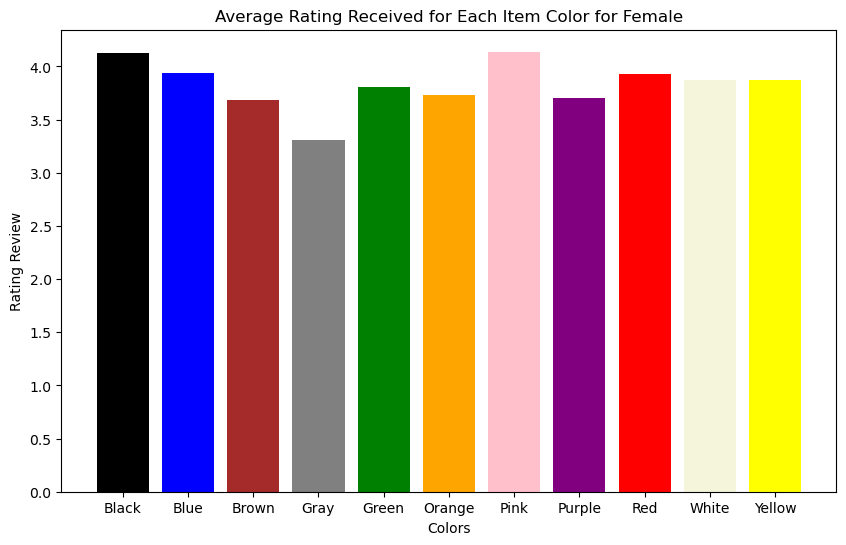

In [91]:
# Plot the average rating review received for each item color for female
female = color_organized_df.loc[(color_organized_df["Gender"]=="Female")].sample(n=198)
average_review_by_color = female.groupby('Color Classifications')['Review Rating'].mean().reset_index()
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
plt.figure(figsize=(10, 6))
plt.bar(average_review_by_color['Color Classifications'], average_review_by_color["Review Rating"], color = color)
plt.xlabel('Colors')
plt.ylabel('Rating Review')
plt.title('Average Rating Received for Each Item Color for Female')
plt.show()

This chart portrays the average rating that a female in the sample gave each item color. The purpose of this chart is to reveal any preferences in color selection that a female may have. Further, the chart seeks to assess whether a woman in a society powered by gender norms and ideologies would rate items that were in traditionally feminine hues like pink, yellow, or white more favorably than items in traditionally masculine hues like black, brown, and gray. However, according to the chart, this determination could not be made as females did not prefer or particularly dislike any color with the data showing an almost even split in ratings across all colors. However, it can be noted that females did rate "feminine" colors (pink, white, yellow, purple) slightly more favorably than traditionally masculine colors (black, brown, gray).

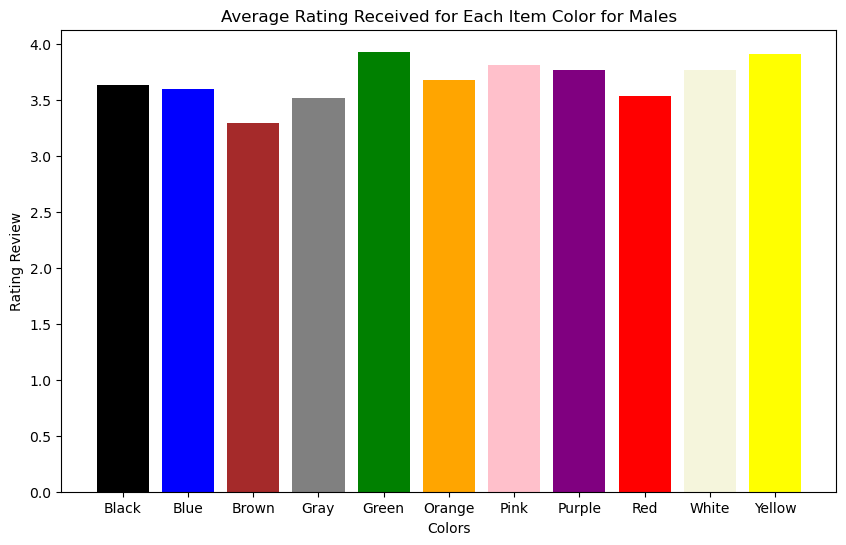

In [92]:
# Plot the average rating review received for each item color for males
male = color_organized_df.loc[(color_organized_df["Gender"]=="Male")].sample(n=198)
average_review_by_color = male.groupby('Color Classifications')['Review Rating'].mean().reset_index()
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
plt.figure(figsize=(10, 6))
plt.bar(average_review_by_color['Color Classifications'], average_review_by_color["Review Rating"], color = color)
plt.xlabel('Colors')
plt.ylabel('Rating Review')
plt.title('Average Rating Received for Each Item Color for Males')
plt.show()

This chart portrays the average rating that a male in the sample gave each item color. The purpose of this chart is to reveal any preferences in color selection that a male may have. Further, the chart seeks to assess whether a male in a society powered by gender norms and ideologies would rate items that were in traditionally masculine hues like black, brown, red, and gray more favorably than items in traditionally feminine hues like pink, purple, white and gray. However, according to the chart, this determination could not be made as males did not consistently prefer or particularly dislike any color with the data showing a similar split in ratings across all colors and deviating from statistical expectations. However, it can be noted that males did rate some "masculine" colors (black, brown, gray, and red) slightly more favorably than traditionally feminine colors (white and yellow). However. these results are inconsistent and ultimately inconclusive.

## How often do certain age groups shop?

In [93]:
organized_df['Age Groups'].value_counts()

Age Groups
Gen X          1272
Millennials    1200
Baby Boomer     788
Gen Z           640
Name: count, dtype: int64

In [94]:
age_group_df = pd.DataFrame ({'Age Groups' : ['Gen Z', 'Millenials', 'Gen X',' Baby Boomers'],'Age_count': [640, 1200, 640, 788]})
age_group_df

,Age Groups,Age_count
0,Gen Z,640
1,Millenials,1200
2,Gen X,640
3,Baby Boomers,788


<Axes: ylabel='Age_count'>

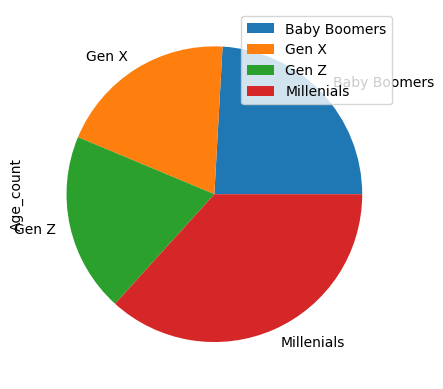

In [95]:
age_group_df = pd.DataFrame ({'Age Groups' : ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers'] , 'Age_count': [640, 1200, 640, 788]})
age_group_df.groupby(['Age Groups']).sum().plot(kind='pie', y='Age_count')

Based on the data above, the Baby Boomer generation typically spends the most amount of money when pertaining to online shopping. Millenials are the next largest generation to shop online. Gen-z and Gen-x spend the least amount of time online shopping compared to Boomers and Millenials.

## What region spends the most frequently?

In [97]:
organized_df['Location'].value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

Our data indicated Montana as being the most frequent state listed in our online shopping data. Montana had a total of 96 occurences with California as a close second with 95 occurences.

## How does the average online shopping expenditure of Gen Z compare to that of Millennials?

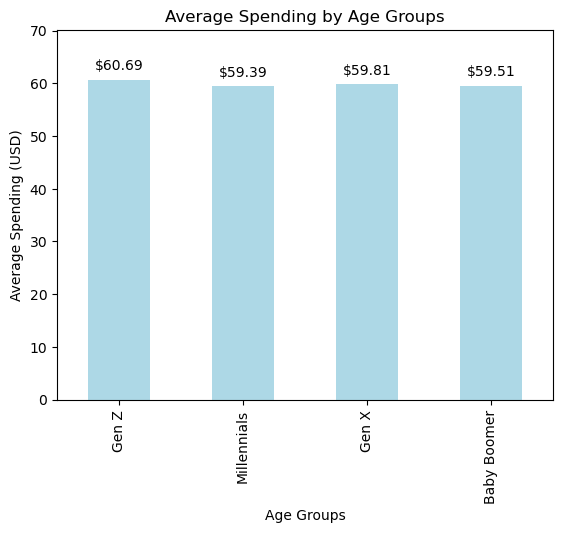

In [98]:
average_spending = organized_df.groupby('Age Groups')['Purchase Amount (USD)'].mean()
# Filtering out the Silent Generation

# Plotting the average spending
ax = average_spending.plot(kind='bar', color='lightblue', align='center')
plt.ylabel('Average Spending (USD)')
plt.title('Average Spending by Age Groups')

# Displaying the value on each bar
for p in ax.patches:
    ax.annotate(f"${p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
plt.ylim(top=ax.get_ylim()[1] * 1.1)


plt.show()

The analysis of average spending across different generation groups reveals a remarkably consistent pattern, with minimal variation in purchase amounts ranging from approximately 
60.85 across Gen Z, Millennials, Gen X, and Baby Boomers. This suggests a similar level of consumer expenditure among these demographics.

## Which age group or generation tends to make more purchases when discounts or promotions are offered?

In [102]:
grouped_df = organized_df.groupby(['Age Groups', 'Discount Applied'])
grouped_df
# Aggregating the grouped data (e.g., getting the count of each group)
aggregated_df = grouped_df.size().reset_index(name='Count')
aggregated_df

,Age Groups,Discount Applied,Count
0,Gen Z,No,367
1,Gen Z,Yes,273
2,Millennials,No,680
3,Millennials,Yes,520
4,Gen X,No,733
5,Gen X,Yes,539
6,Baby Boomer,No,443
7,Baby Boomer,Yes,345


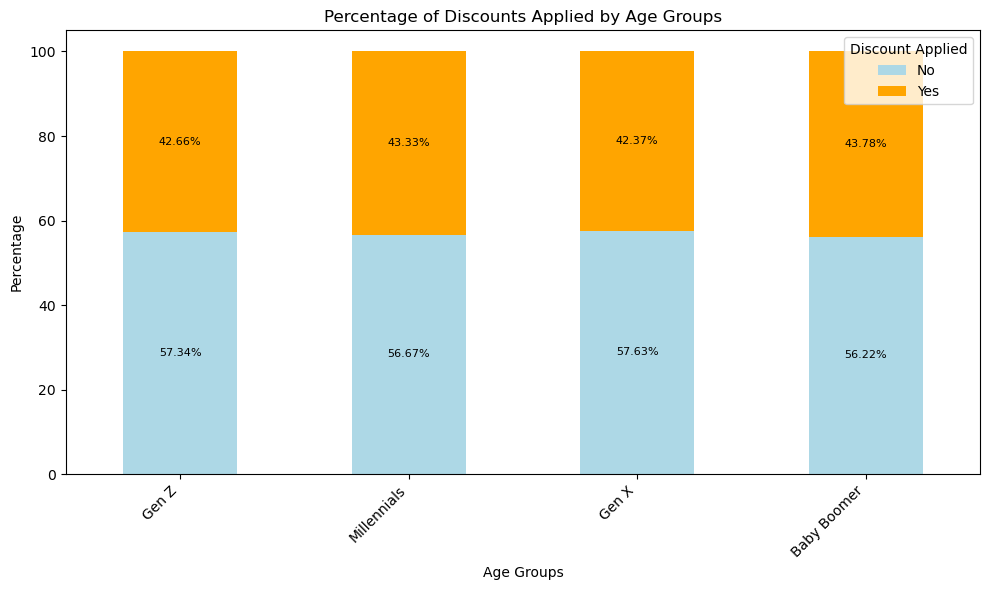

In [103]:
# Pivot the DataFrame to have "Discount Applied" as columns and "Count" as values
pivot_df = aggregated_df.pivot(index='Age Groups', columns='Discount Applied', values='Count')

# Calculate the percentage for each category
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plotting the bar graph
ax = pivot_df_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'orange'], figsize=(10, 6))
plt.ylabel('Percentage')
plt.title('Percentage of Discounts Applied by Age Groups')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Discount Applied', loc='upper right')
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Annotating the percentage values on the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8)

plt.show()

The analysis of discount application by generation group indicates a consistent trend across different age demographics, with a slight variation in the count of discounts applied between "No" and "Yes" categories. Specifically, Baby Boomers demonstrate a higher count of discounts applied compared to other generations, suggesting a notable propensity for seeking out and utilizing discounts among this demographic.